In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn import metrics

In [3]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [6]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [7]:
# Exploratory Data Analysis
df.shape

(30, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [9]:
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [10]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No missing values are present in the dataset

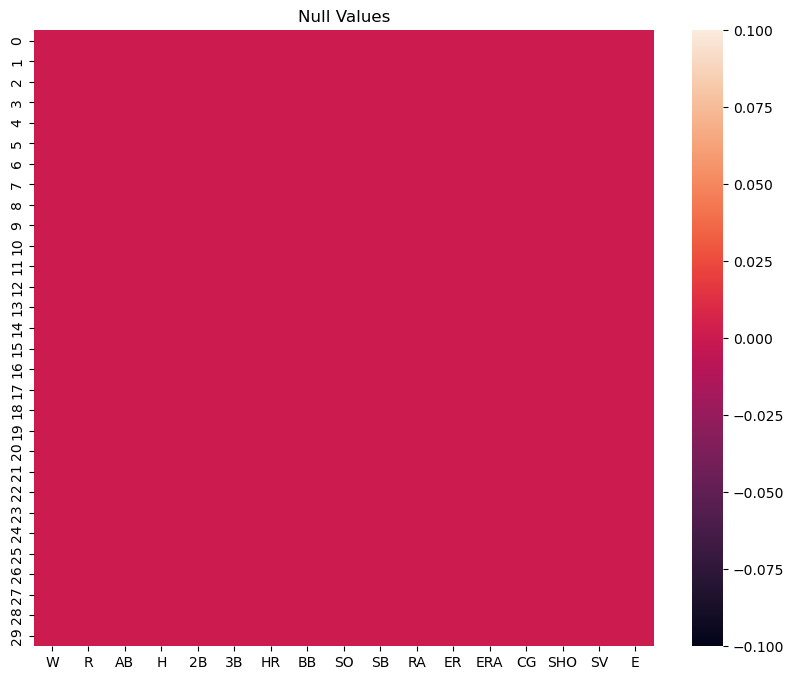

In [11]:
# Checking for null values
plt.figure(figsize=[10,8])
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

There is no null values are there in graph in the dataset

In [12]:
# Checking value counts of target column
df['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

There is no missing values

In [13]:
# Checking description
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


## Data Visualization

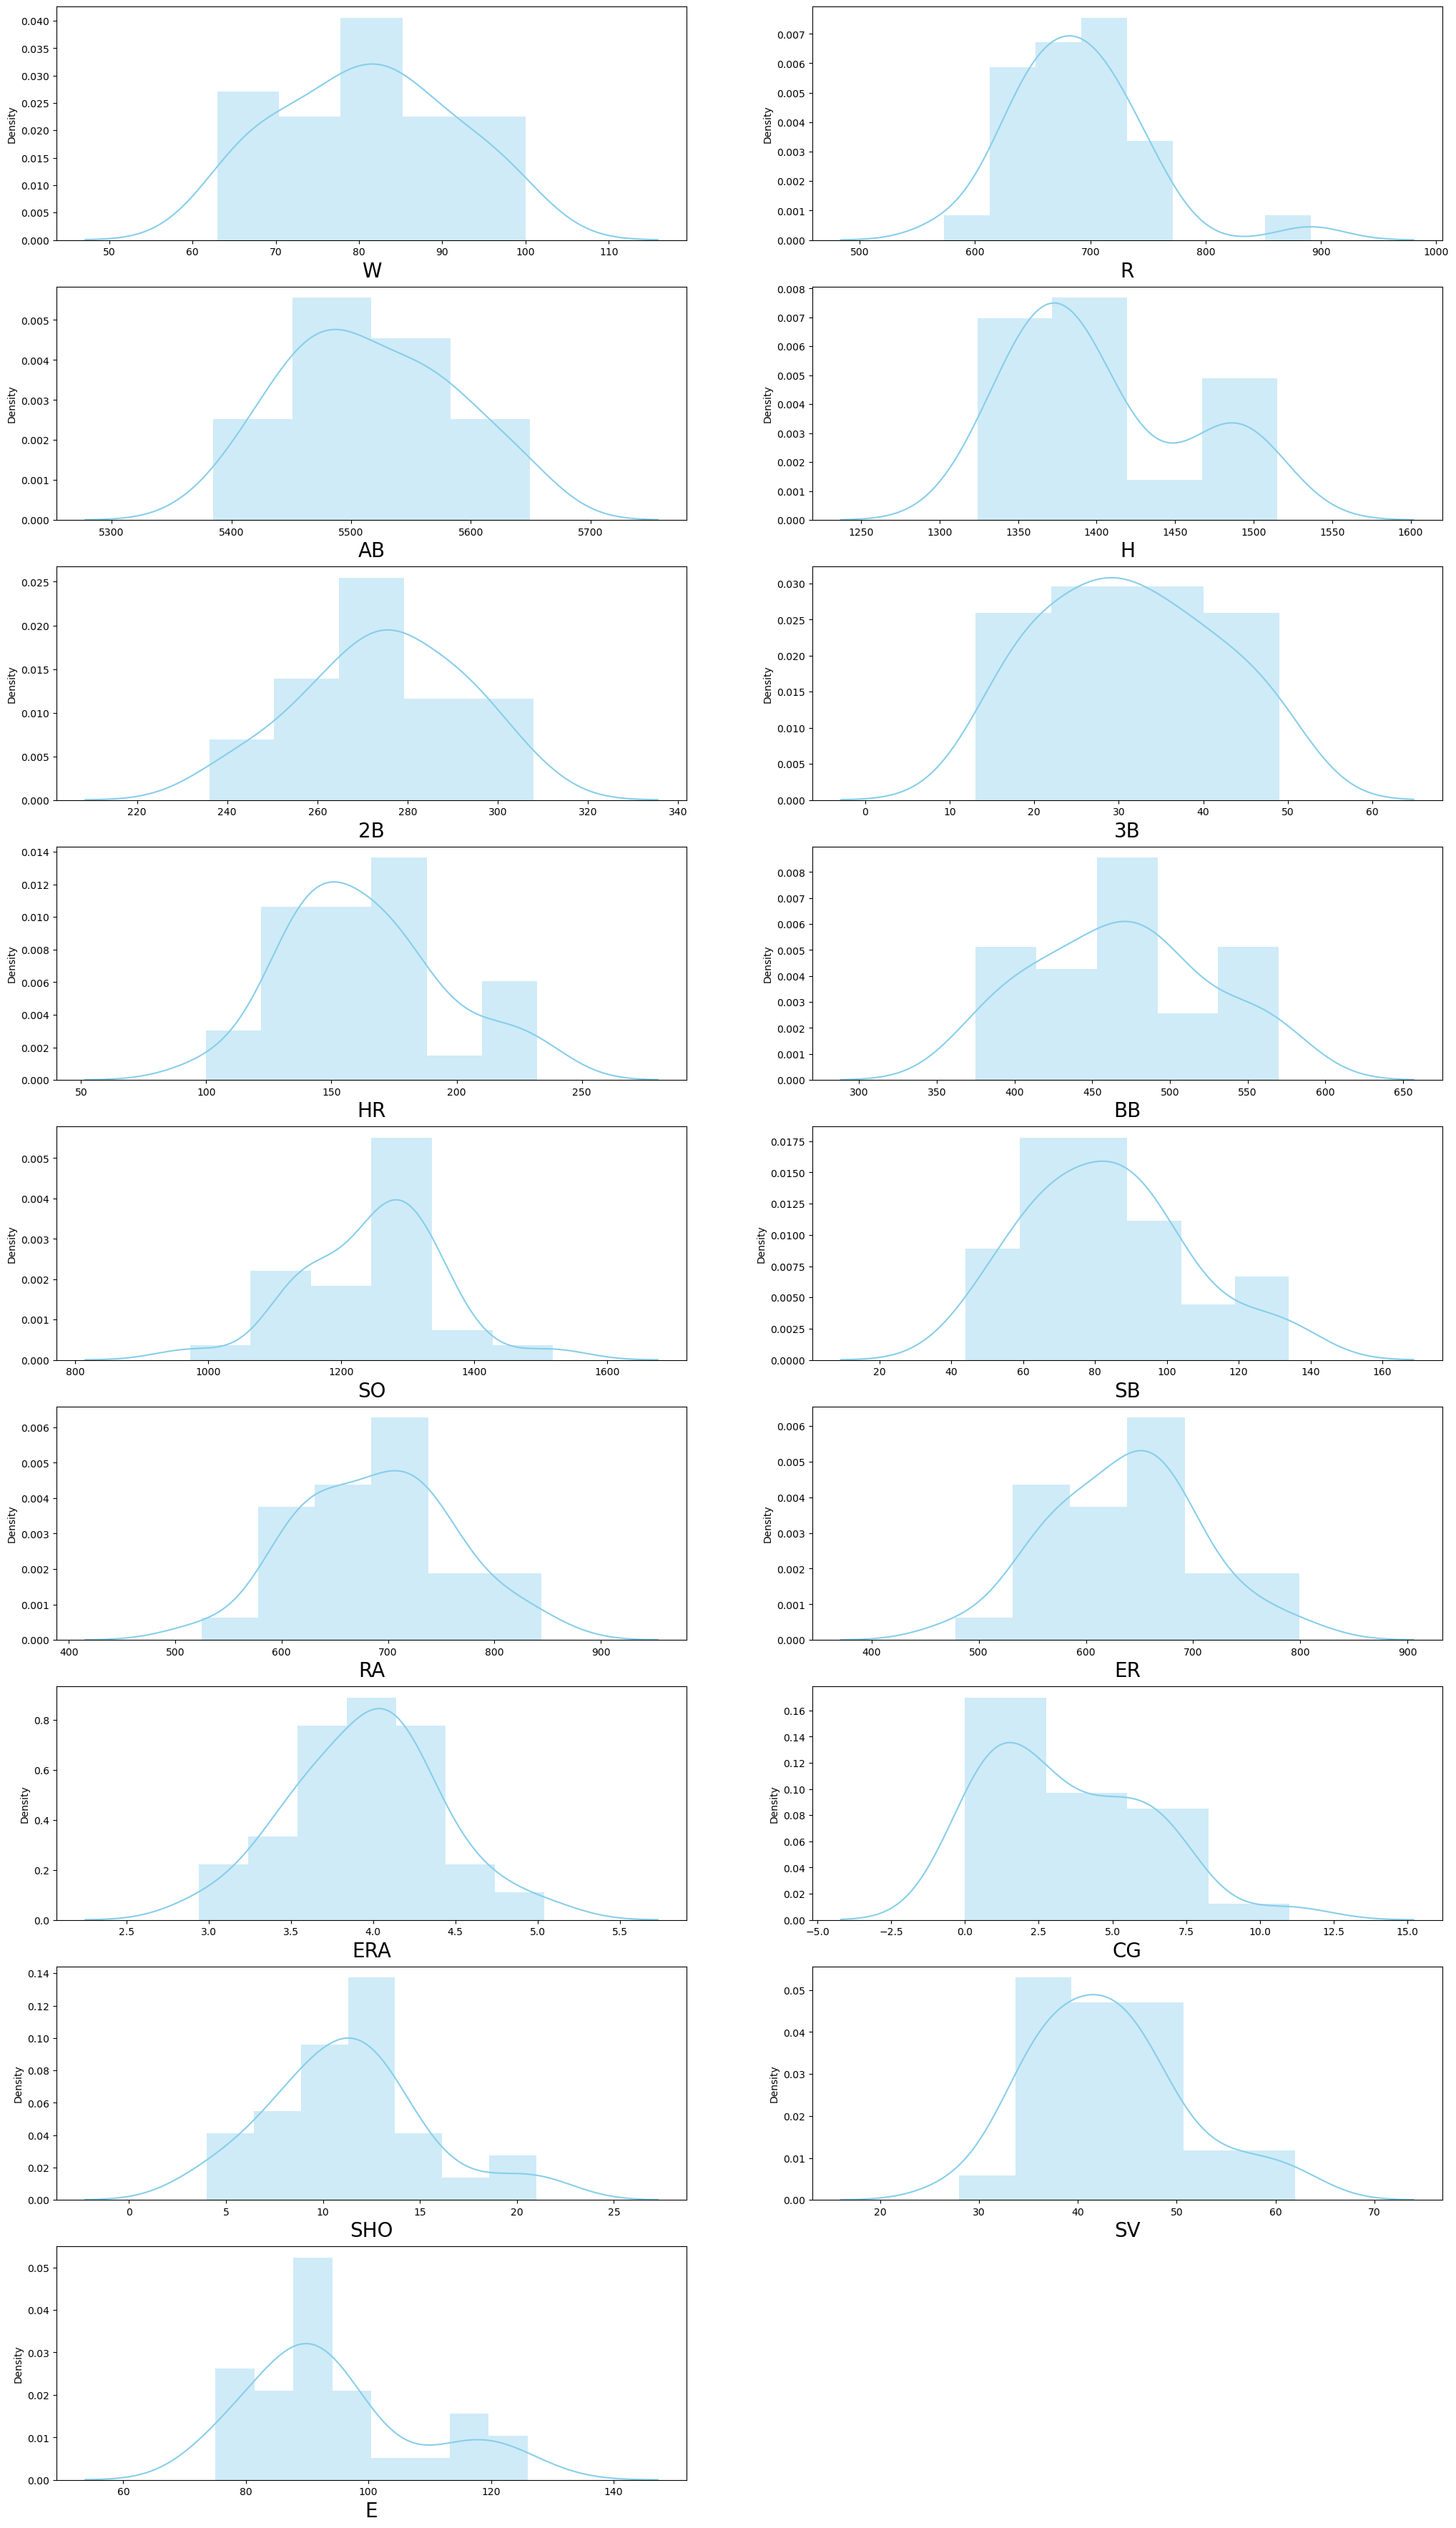

In [14]:
# Univariate Analysis
plt.figure(figsize=(25,50), facecolor='white')
plotnumber=1

for column in df:
    if plotnumber <=17:
        ax= plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color= 'skyblue')
        plt.xlabel(column,fontsize= 20)
    plotnumber +=1
plt.show()

Almost all the columns are normally distributed except R,SO,CG & E

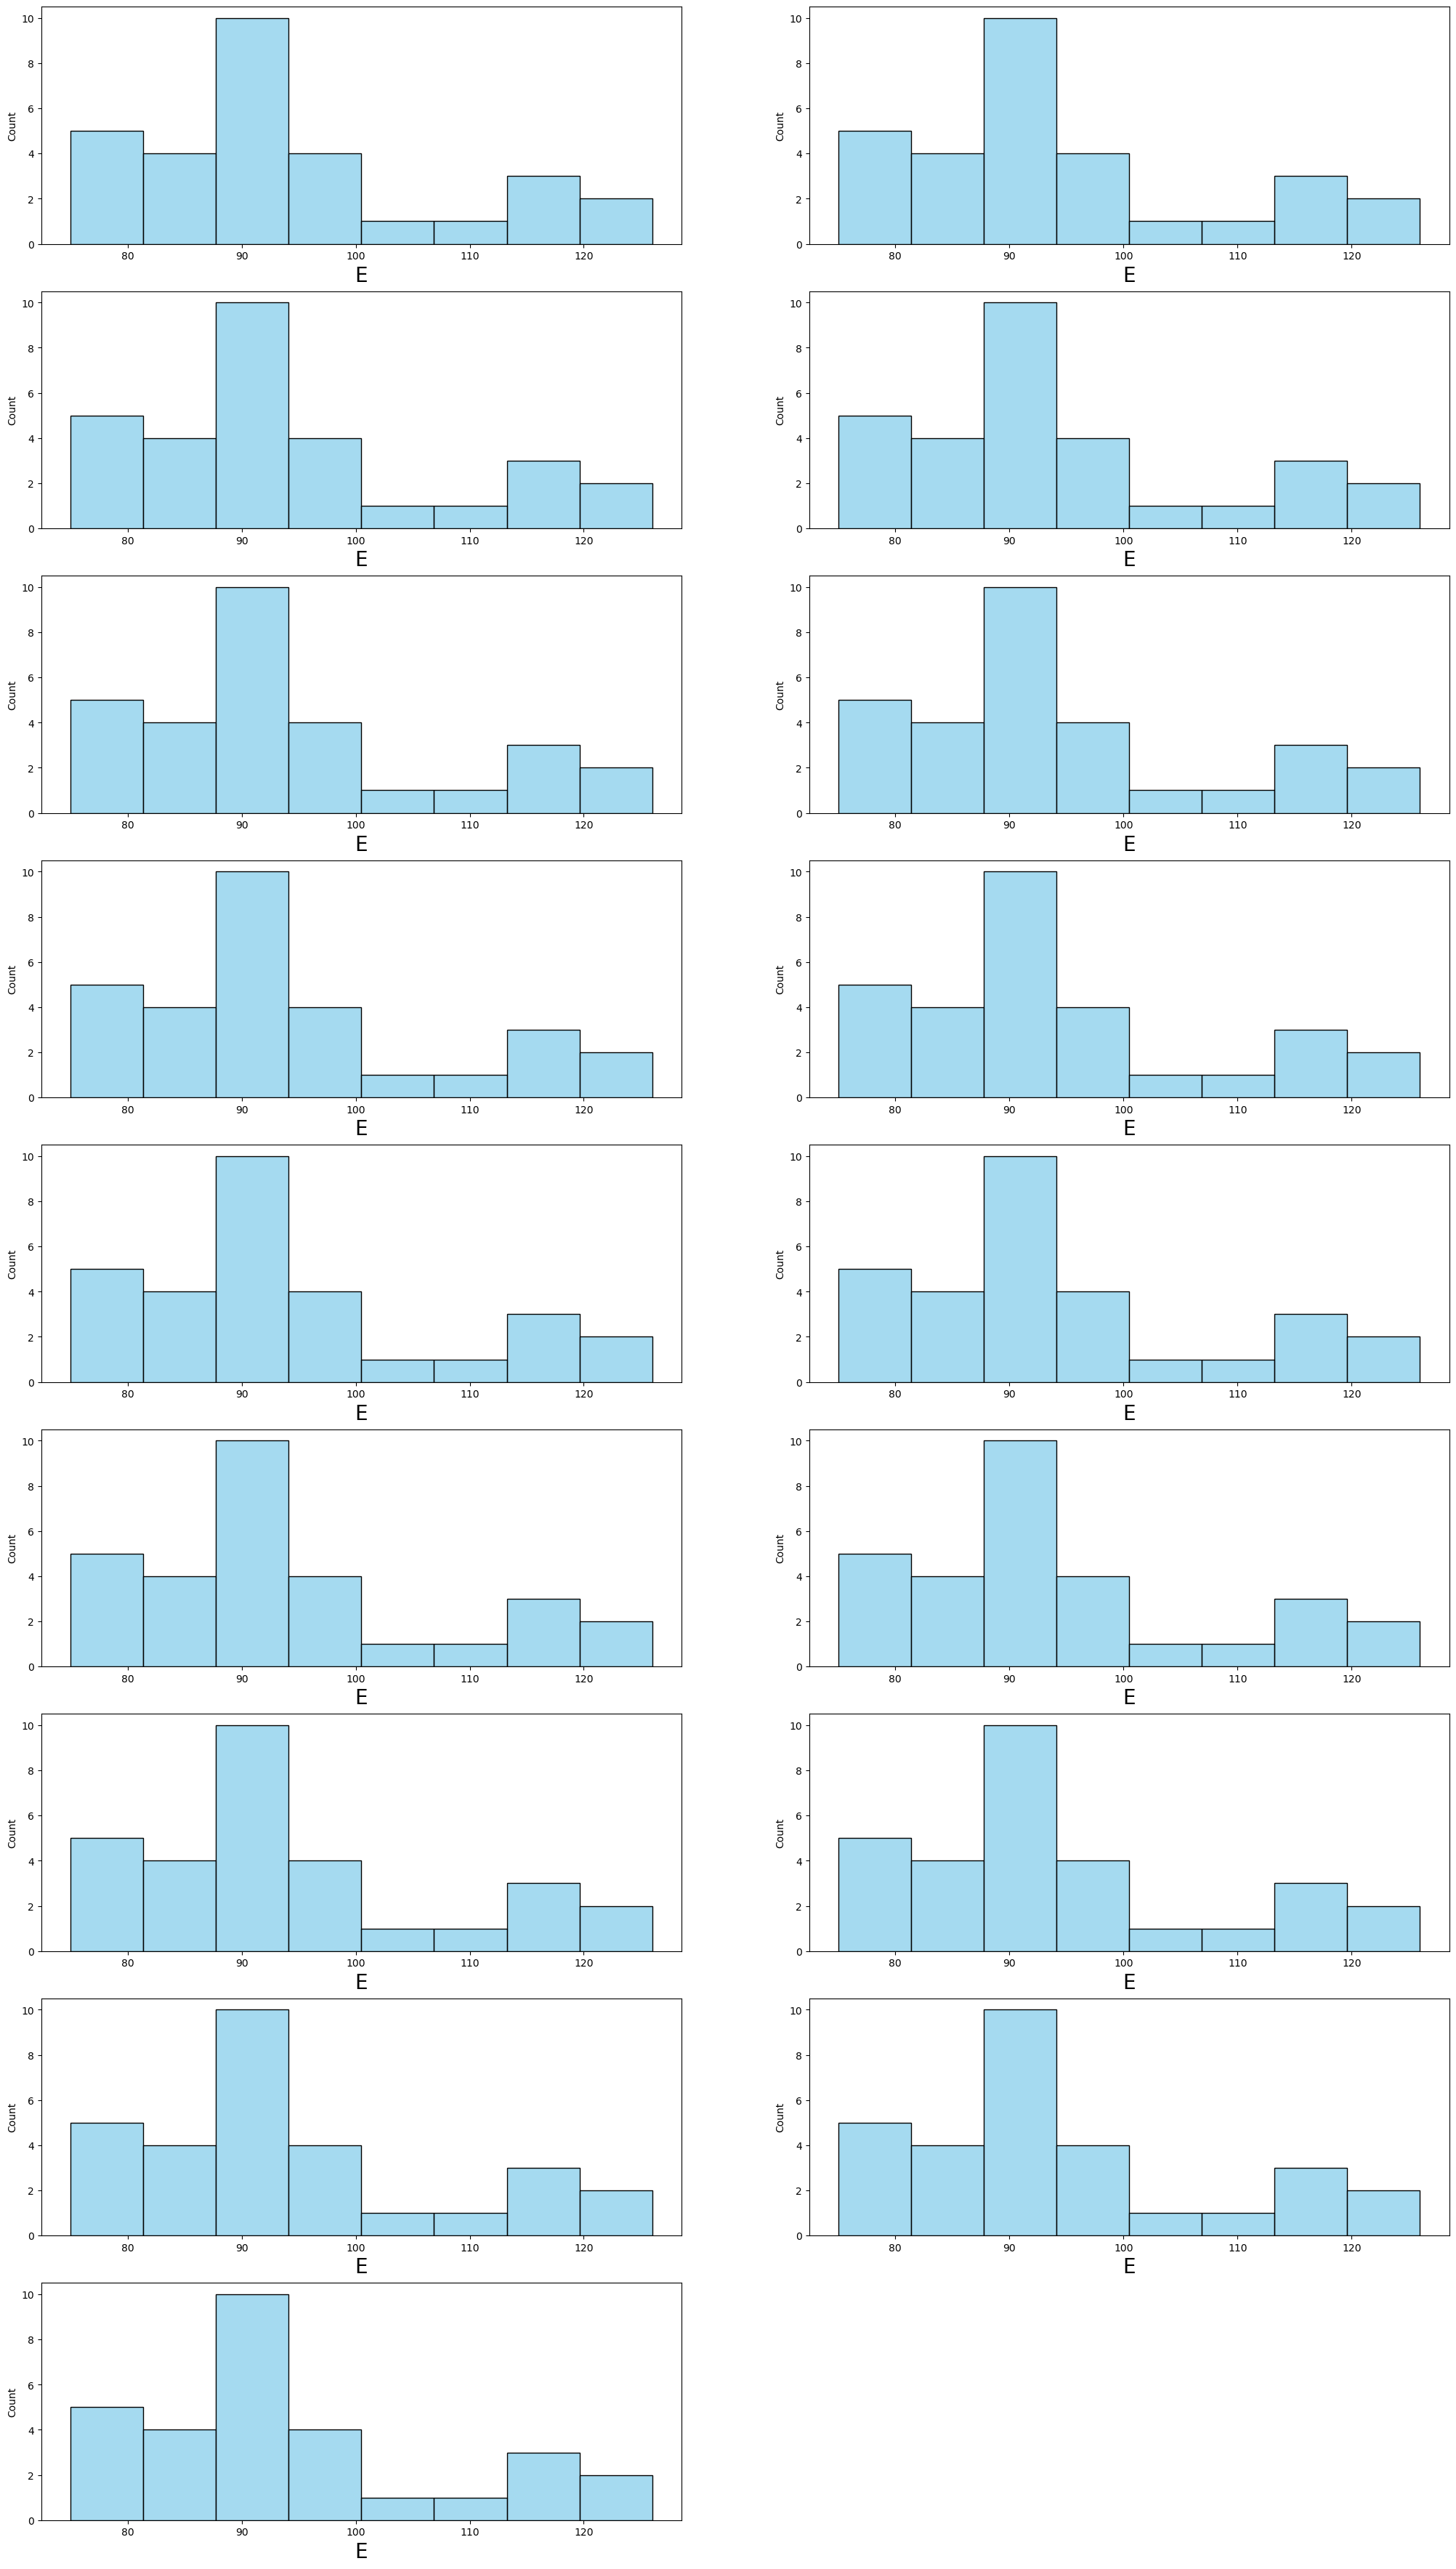

In [15]:
plt.figure(figsize= (25,50), facecolor= 'white')
plotnumber=1

for columns in df:
    if plotnumber <=17:
        ax= plt.subplot(10,2,plotnumber)
        sns.histplot(df[column], color= 'skyblue')
        plt.xlabel(column, fontsize= 20)
    plotnumber+=1
plt.show()

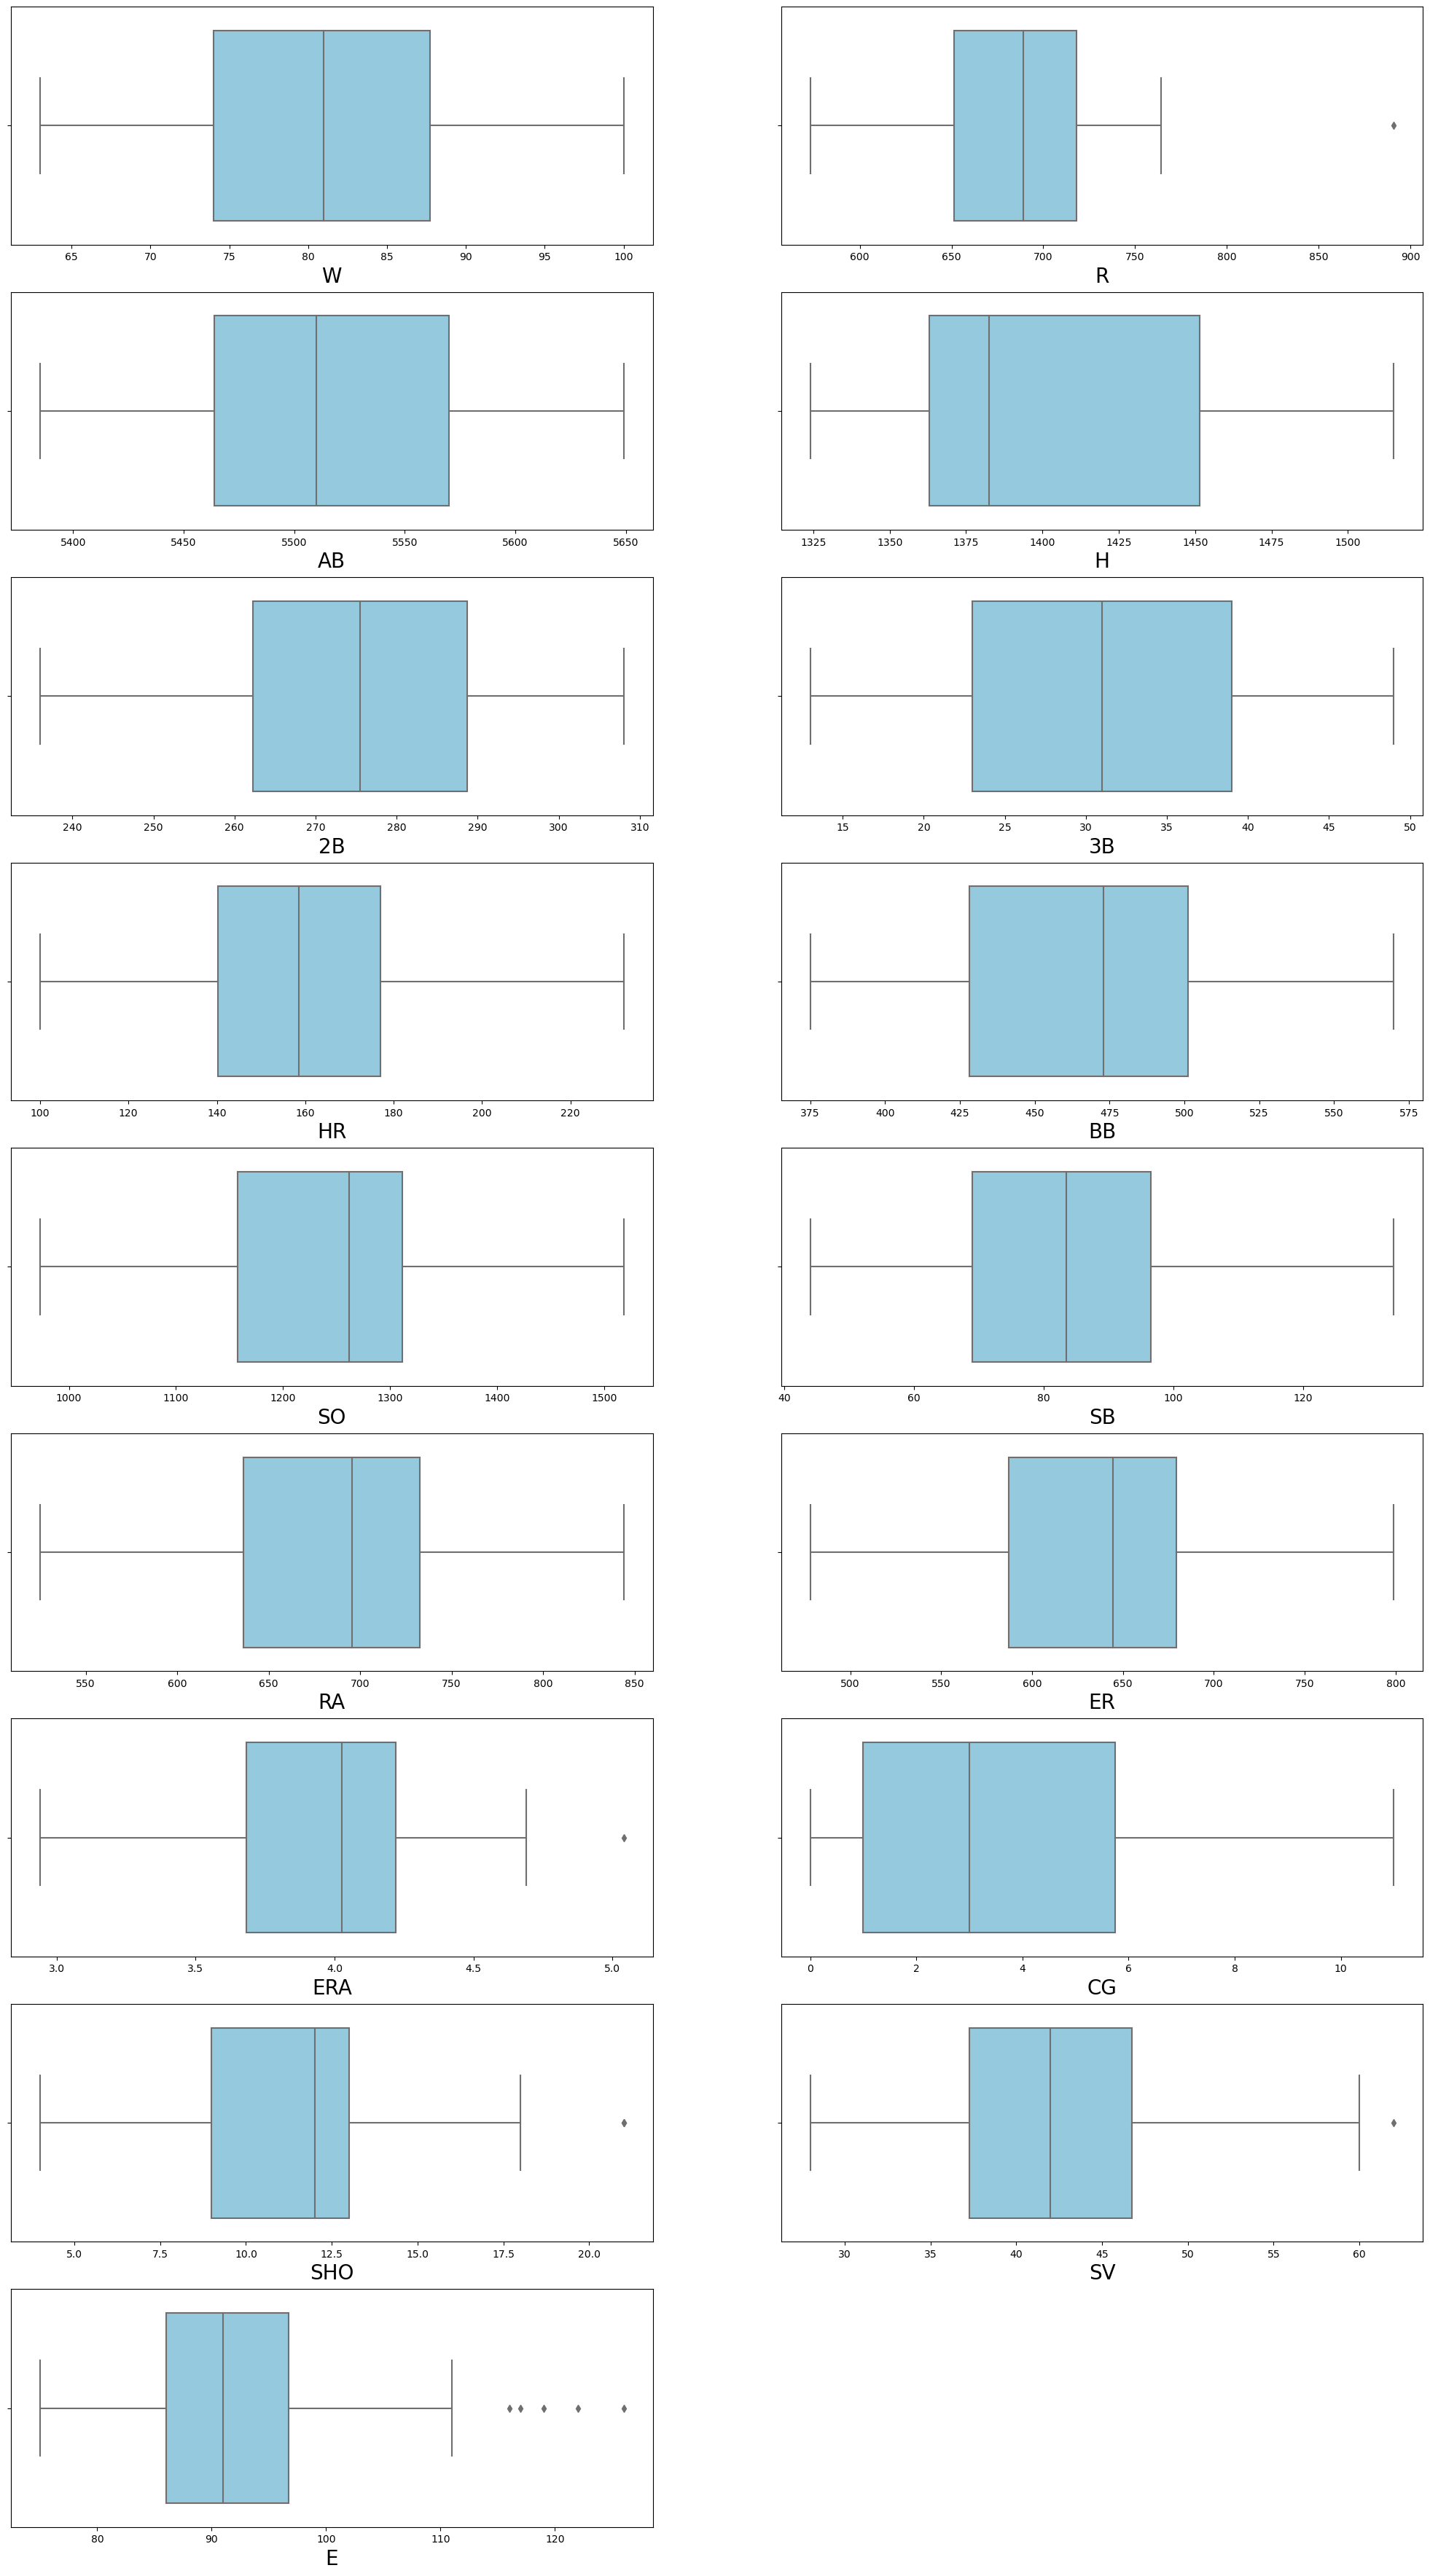

In [17]:
plt.figure(figsize= (25,50), facecolor= 'white')
plotnumber= 1

for column in df:
    if plotnumber <=17:
        ax= plt.subplot(10,2,plotnumber)
        sns.boxplot(df[column], color= 'skyblue')
        plt.xlabel(column, fontsize= 20)
    plotnumber +=1
plt.show()

As shown in boxplot R,ERA,SHO,SV & E input variable is having outliers in it. So, we need to remove outliers.

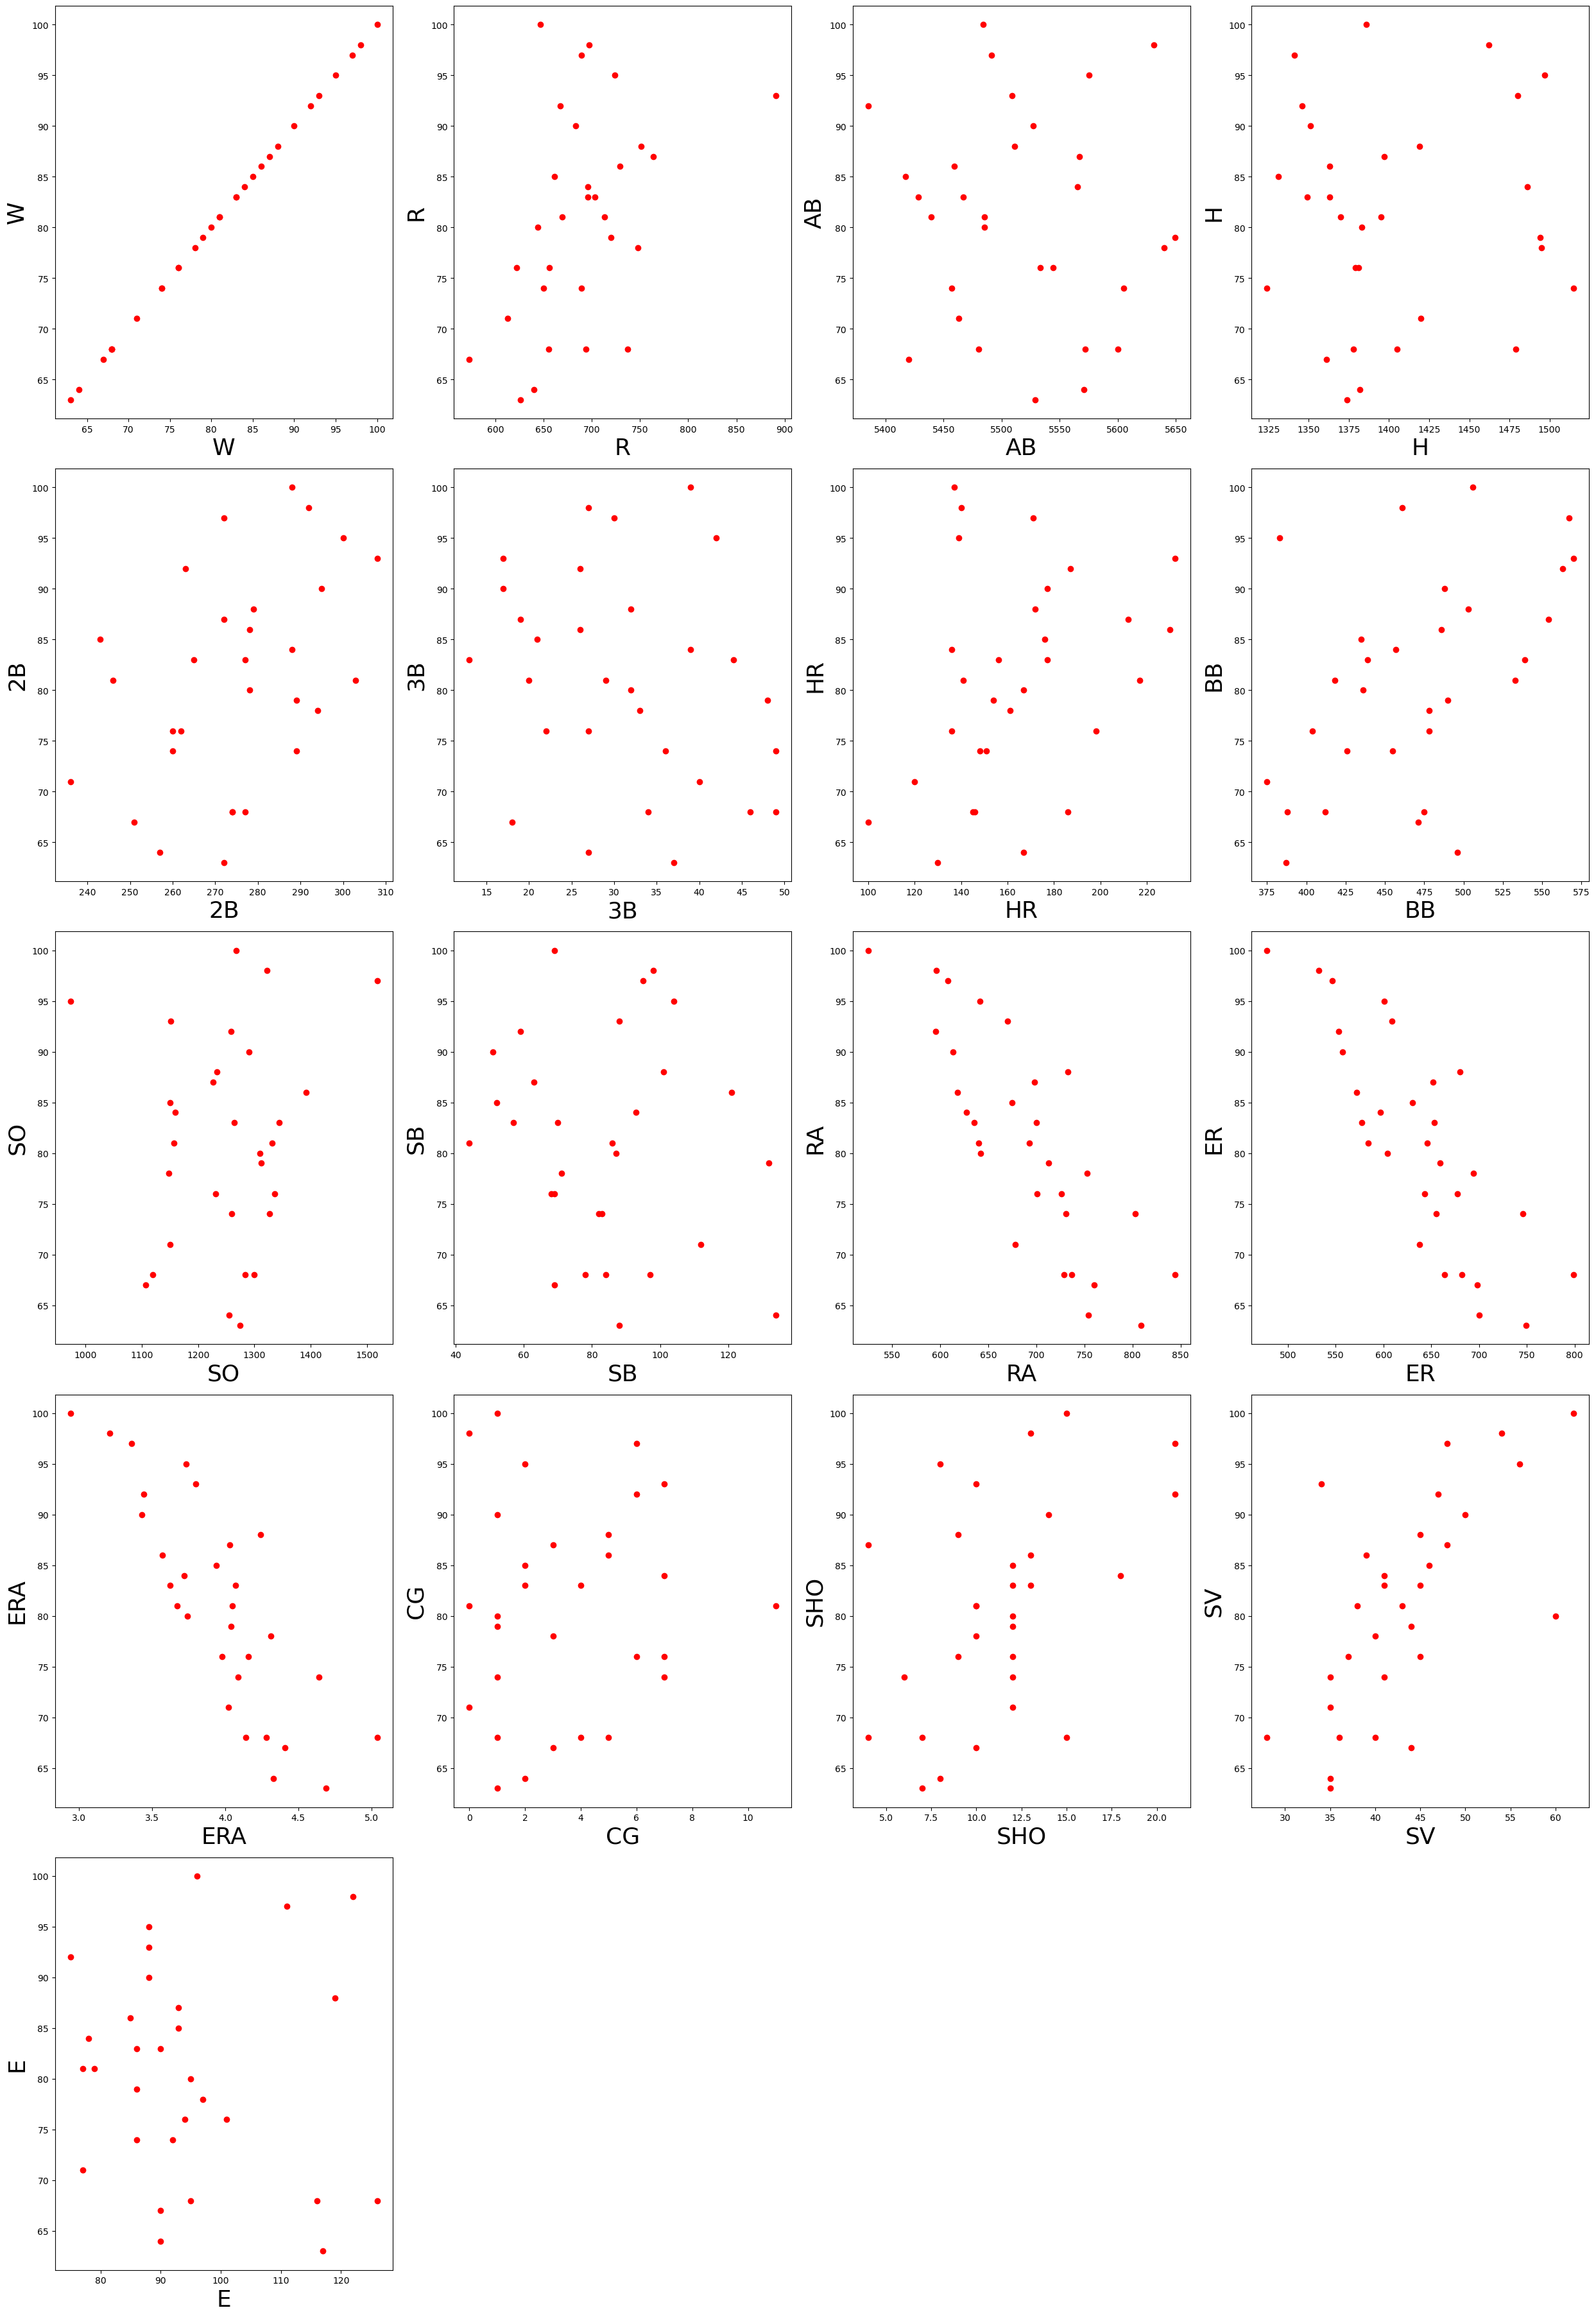

In [18]:
# Bivariate Analysis

plt.figure(figsize= (25,50), facecolor= 'white')
plotnumber= 1

for column in df:
    if plotnumber <=20:
        ax= plt.subplot(7,4,plotnumber)
        plt.scatter(df[column], df['W'], color= 'r')
        plt.xlabel(column, fontsize= 26)
        plt.ylabel(column, fontsize= 26)
    plotnumber +=1
plt.tight_layout()

As, we can see in plot SV,ERA,SHO & R is having almost linear relationship with target variable and other varible are having non linear relationship with target variable. 

<Figure size 2500x2000 with 0 Axes>

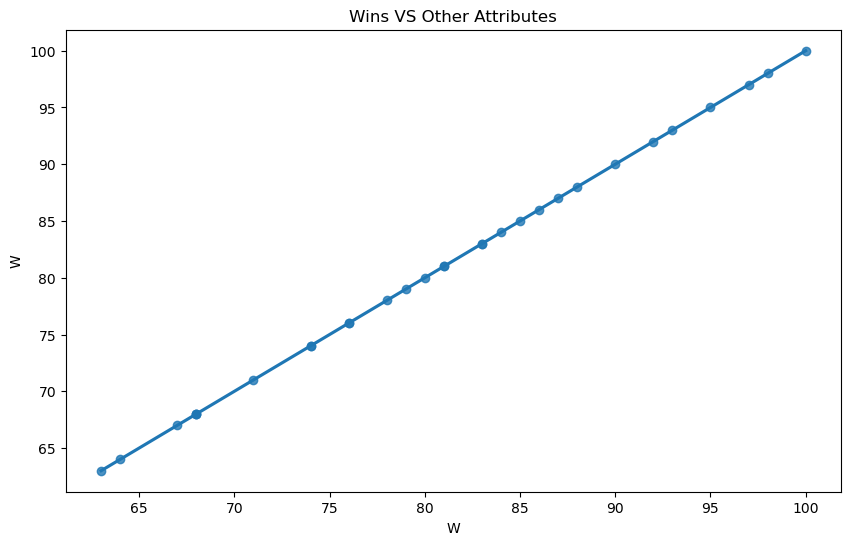

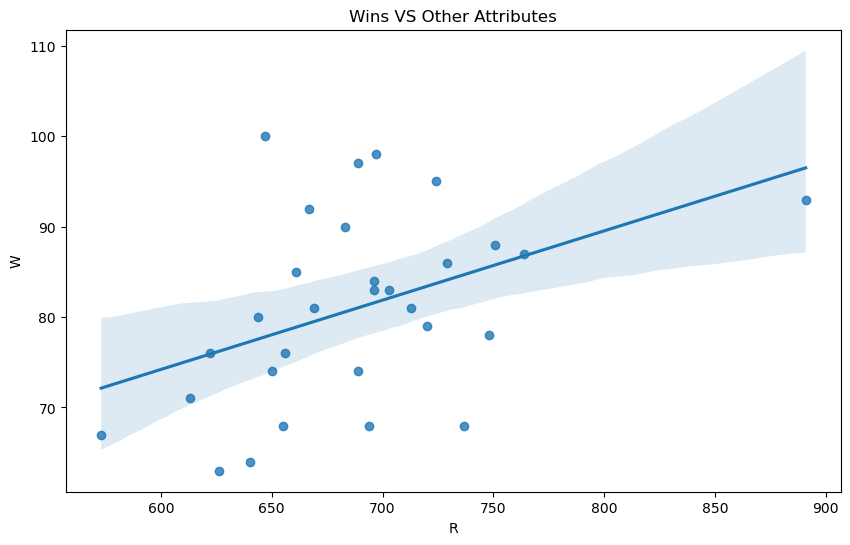

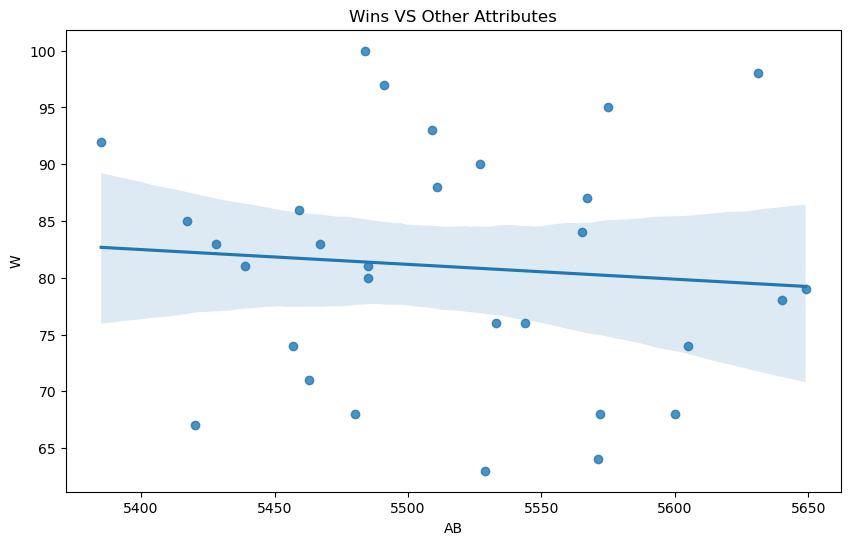

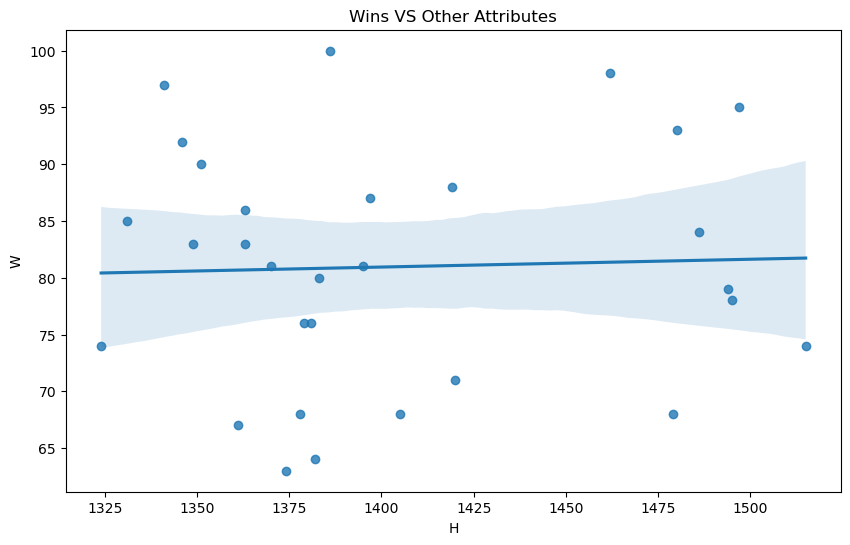

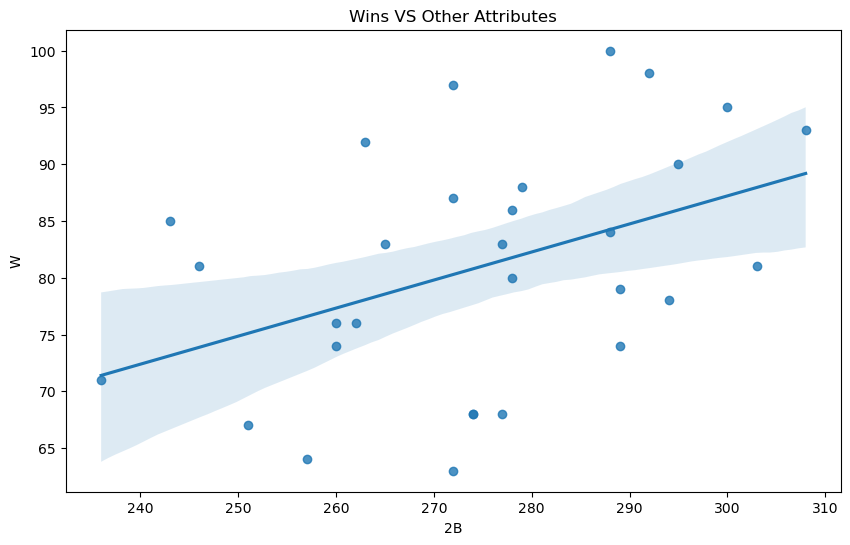

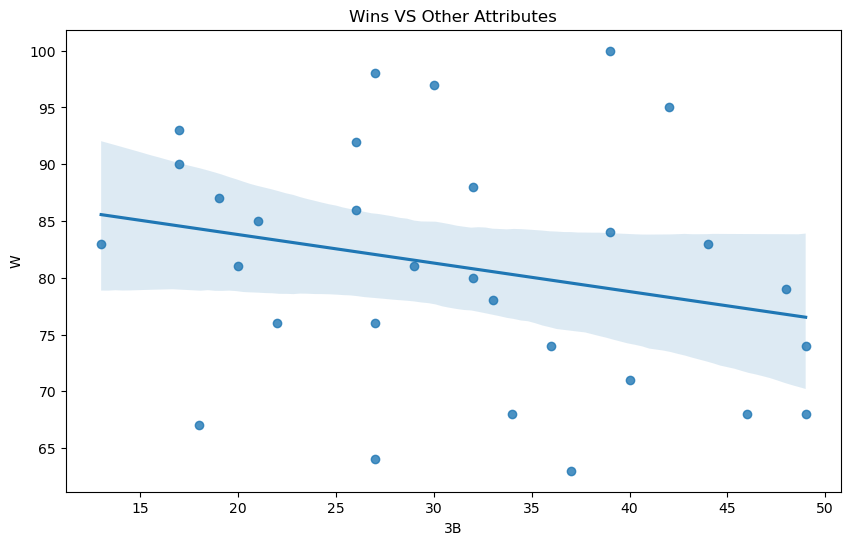

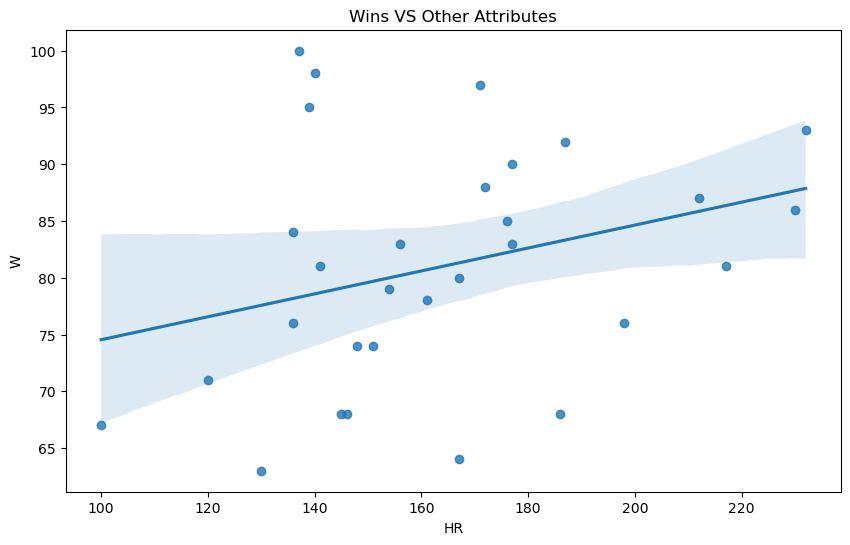

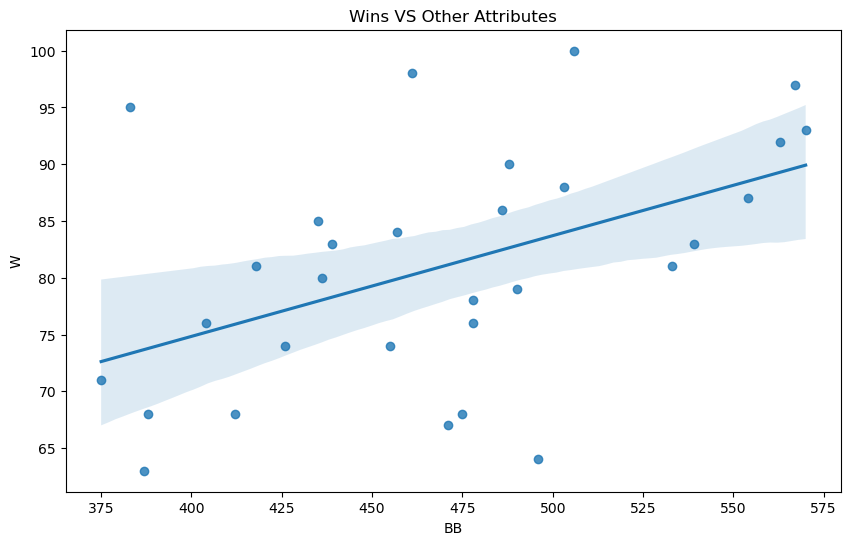

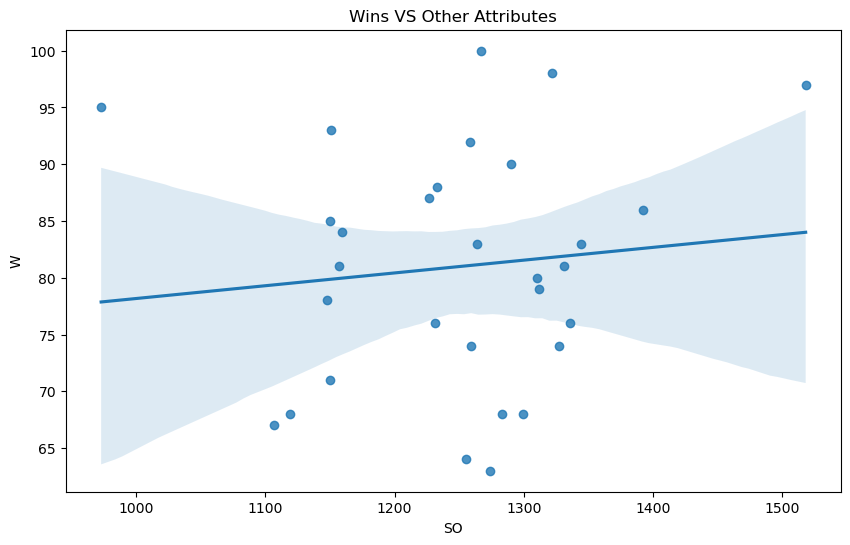

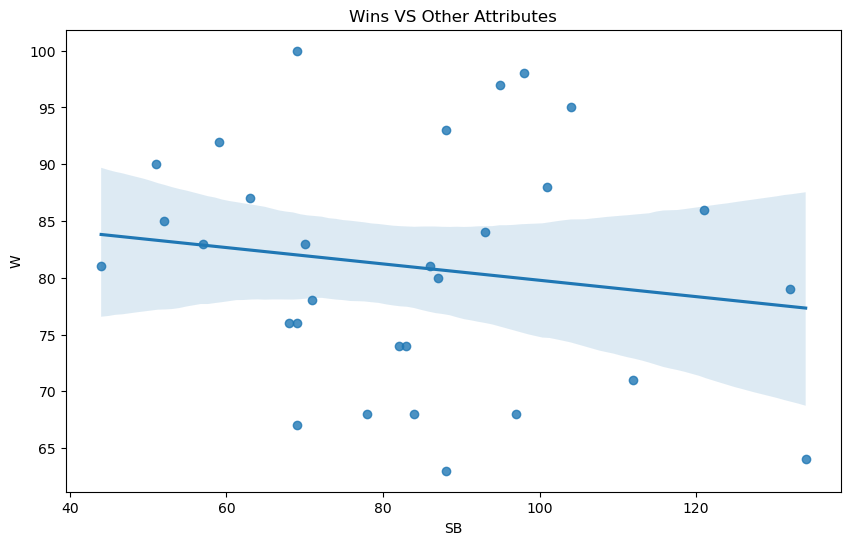

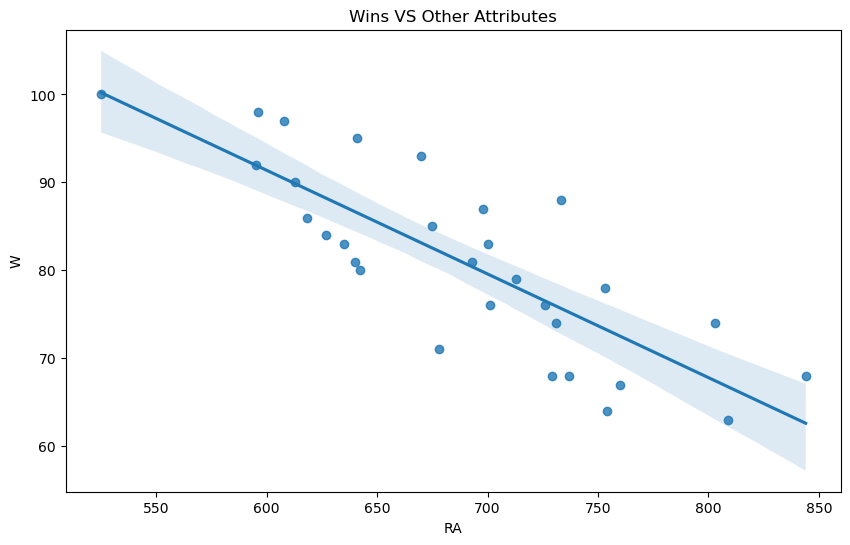

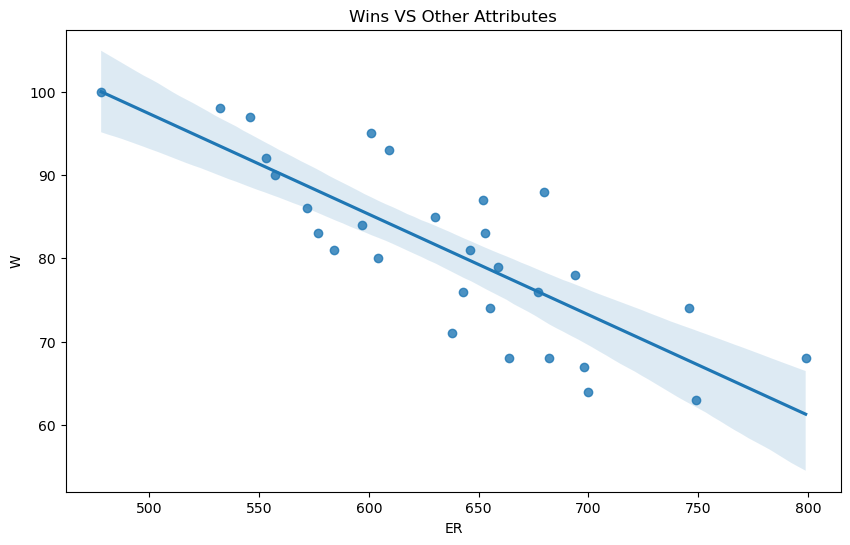

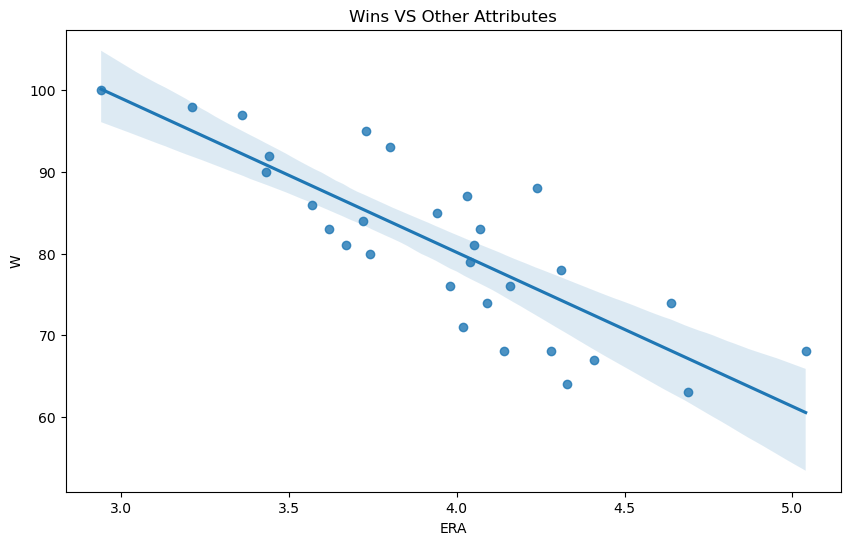

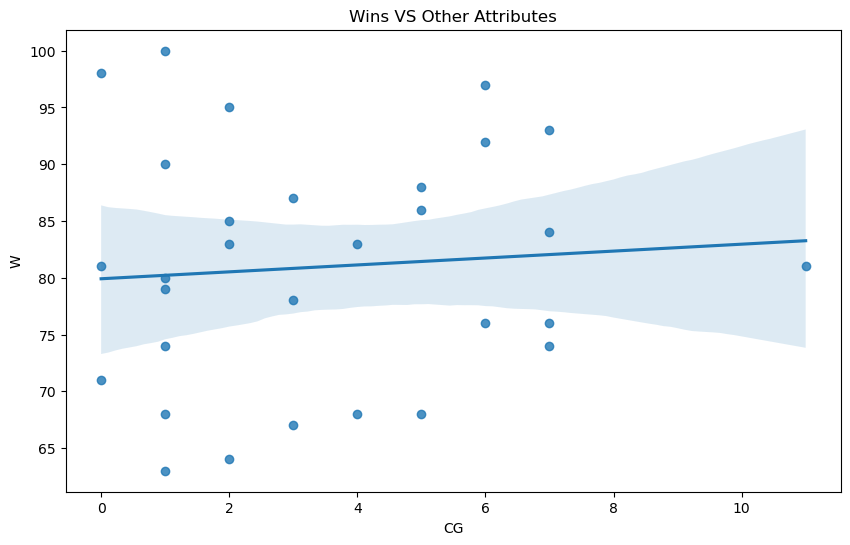

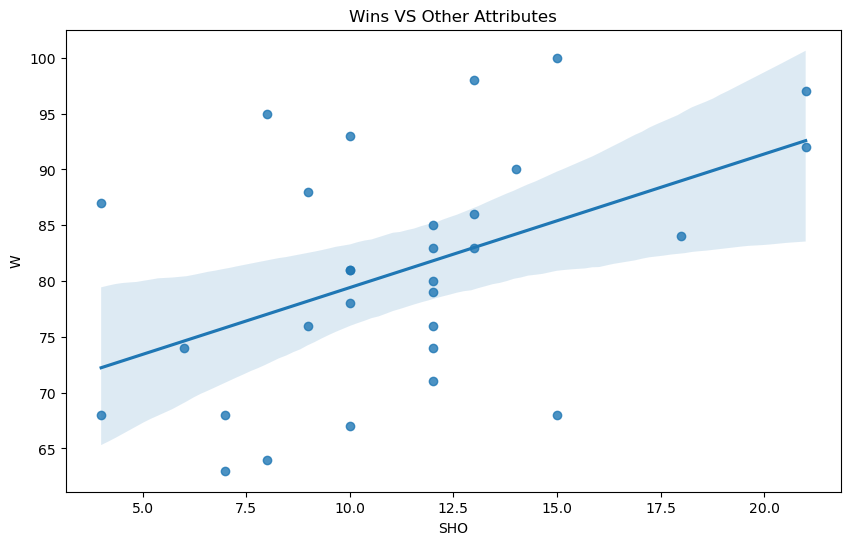

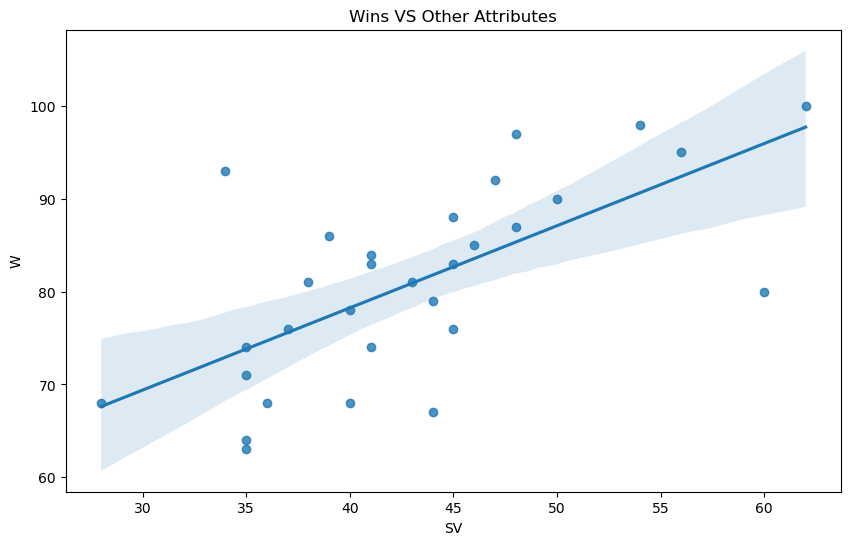

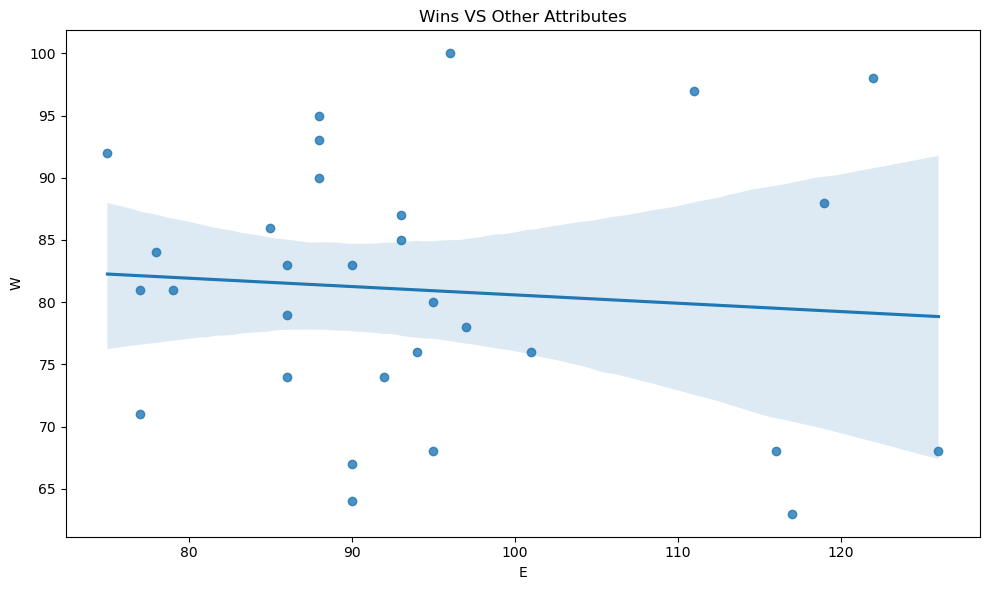

In [22]:
plt.figure(figsize= (25,20), facecolor= 'white')
plotnumber= 1

for column in df:
    if plotnumber <=20:
        plt.figure(figsize= (10,6))
        sns.regplot(df[column], df['W'])
        plt.title('Wins VS Other Attributes')
        plt.xlabel(column)
        plt.ylabel('W')
plt.tight_layout()

RA,ERA,ER have good relation with Win.

## Multivariate Analysis

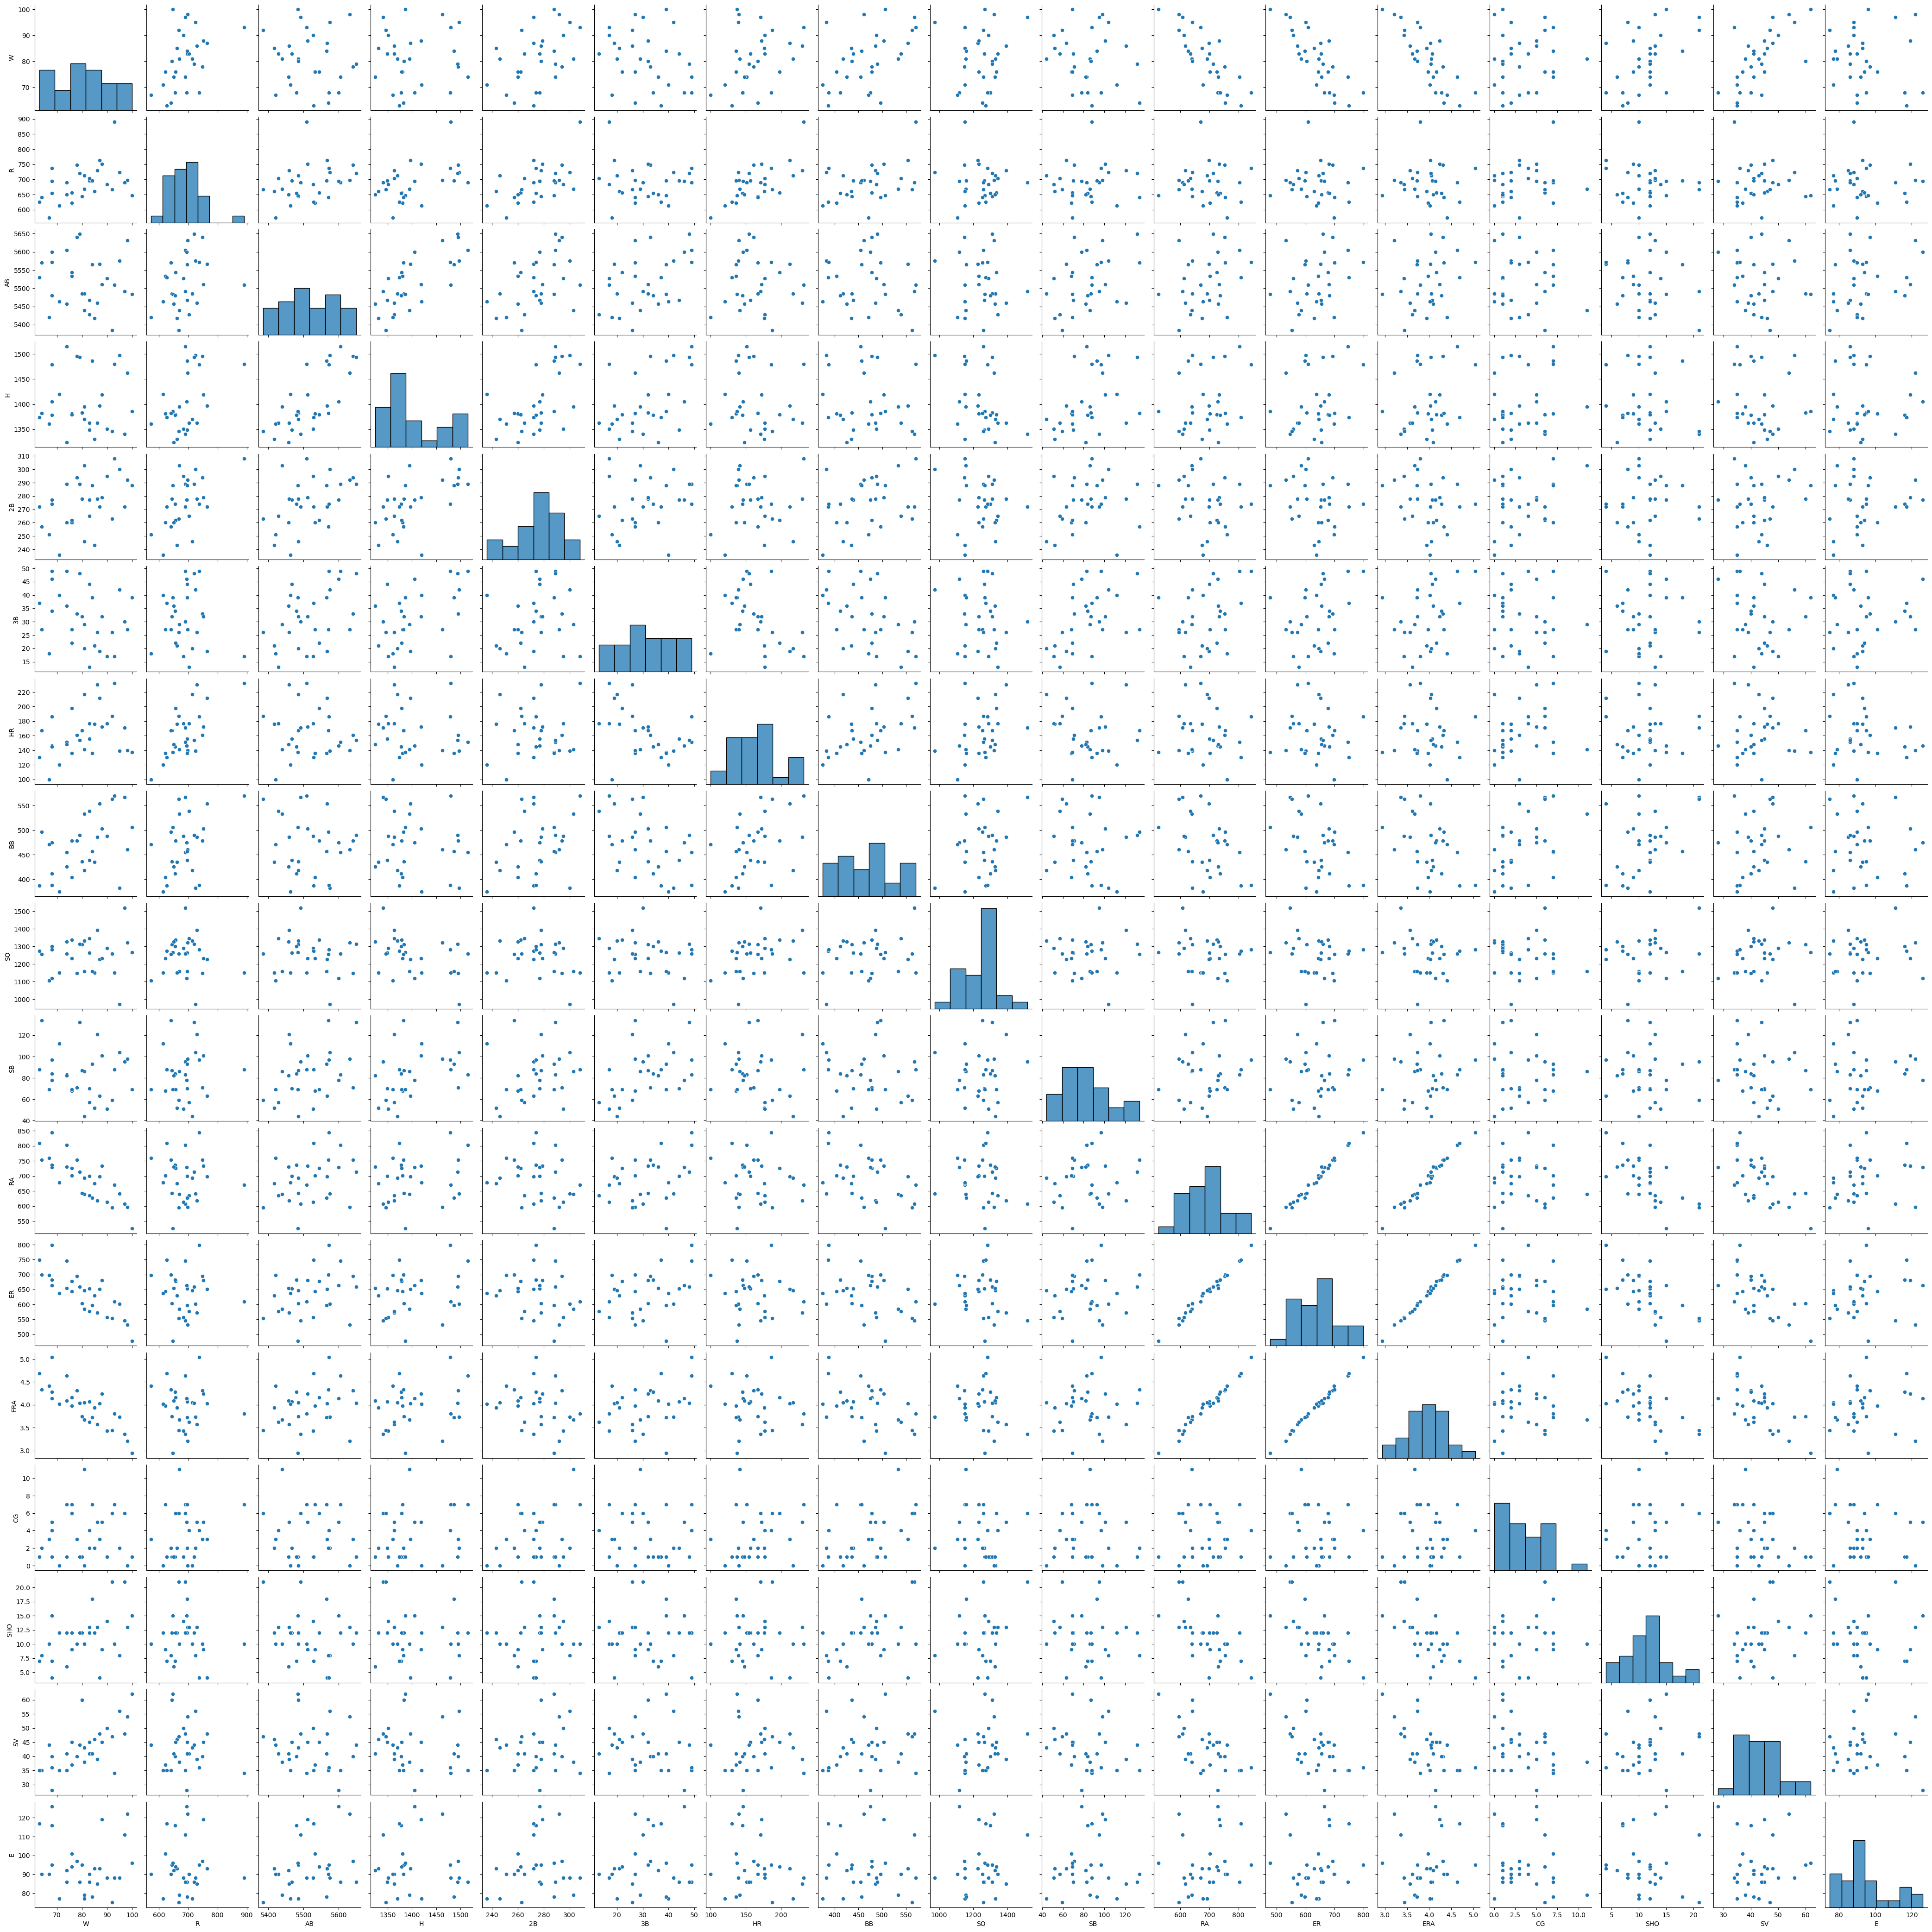

In [23]:
sns.pairplot(df)
plt.show()

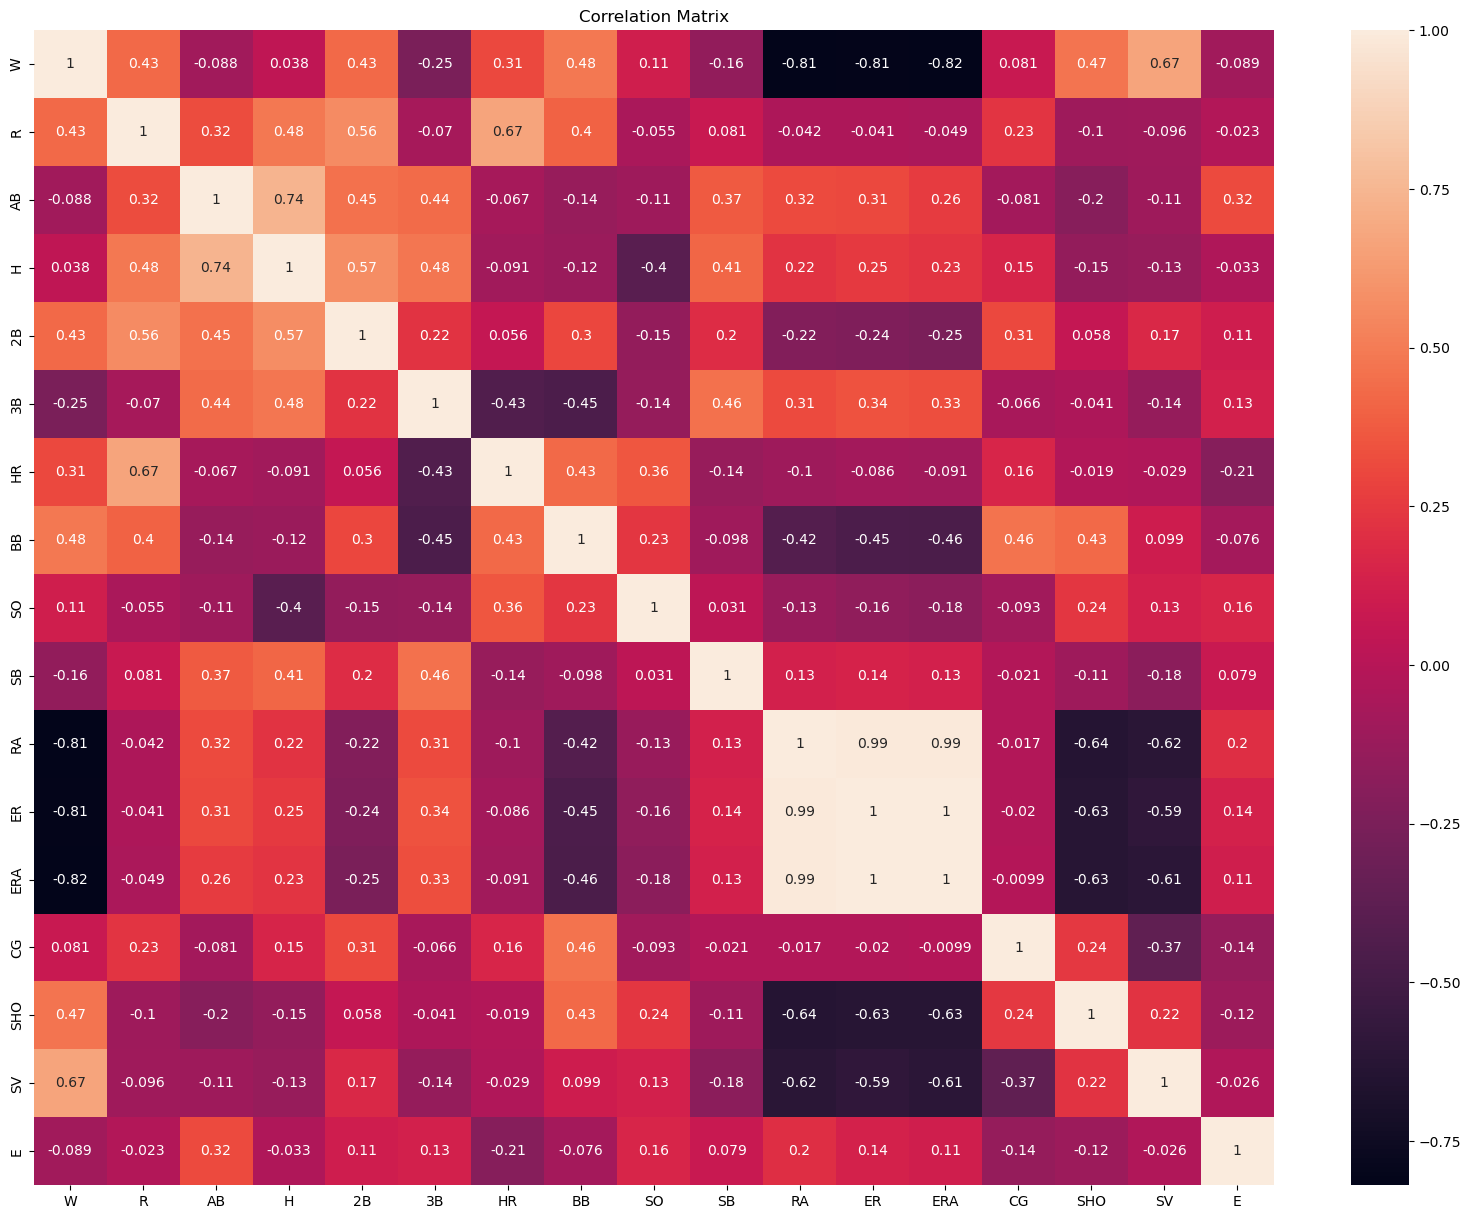

In [24]:
plt.figure(figsize= [20,15])
sns.heatmap(df.corr(), annot= True)
plt.title('Correlation Matrix')
plt.show()

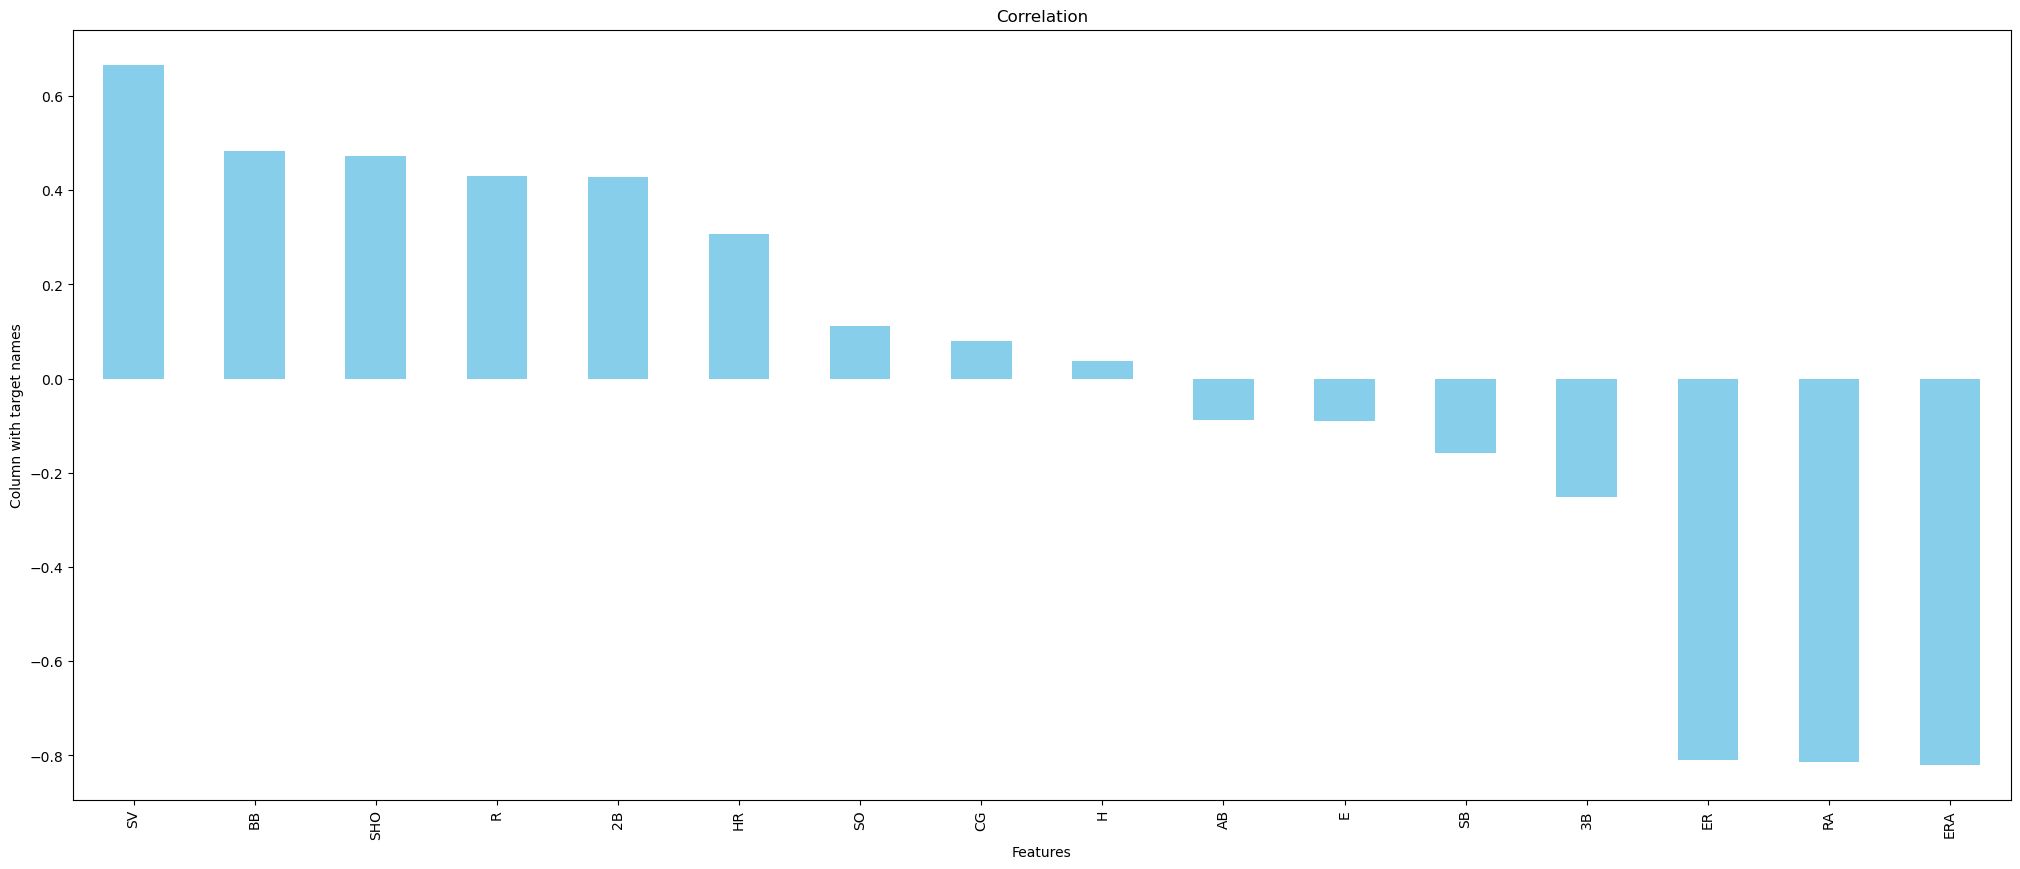

In [25]:
plt.figure(figsize= (25,10))
df.corr()['W'].sort_values(ascending= False).drop(['W']).plot(kind= 'bar', color= 'Skyblue')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

## Data Cleaning

In [26]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

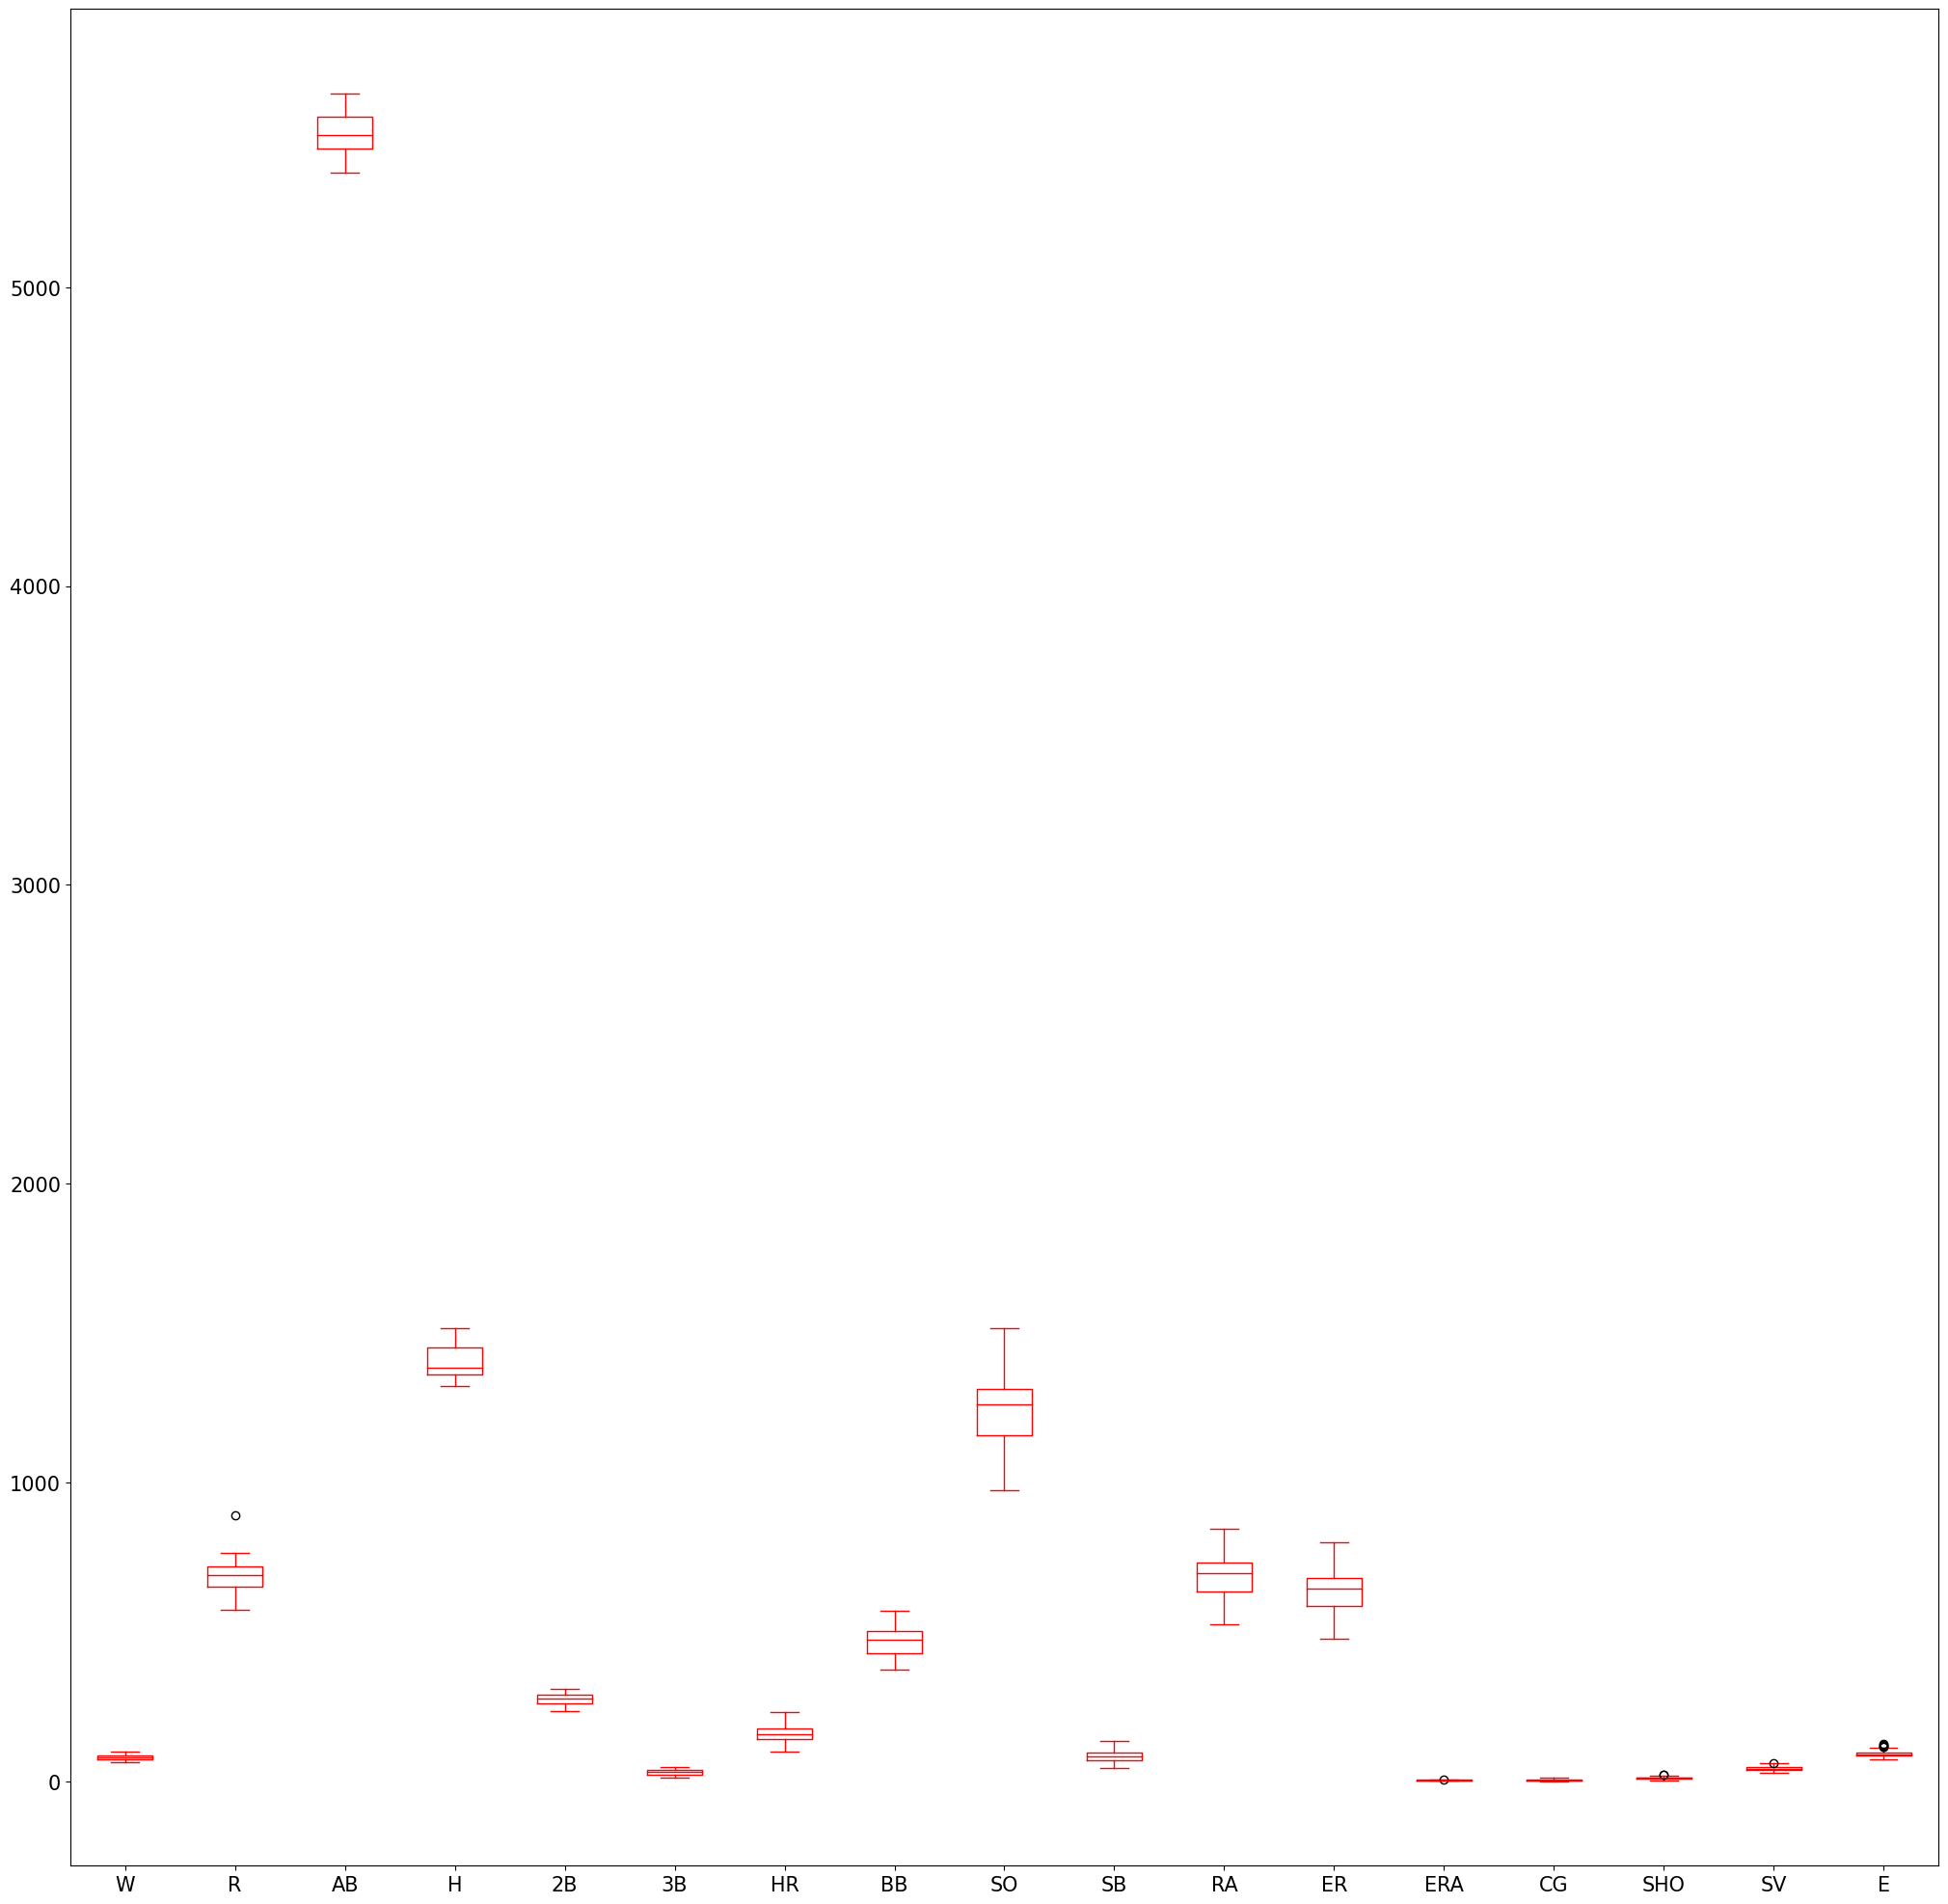

In [27]:
# Checking for outliers

df.plot(kind= 'box', fontsize= 15, figsize=(25,25), color= 'r')

## Removing Outliers

In [28]:
# Zscore Method

features= df[['R', 'ER', 'SHO', 'SV', 'E']]

In [29]:
z= np.abs(zscore(features))
df_new= df[(z<3).all(axis=1)]
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [30]:
# Checking shape of new dataset
df_new.shape

(29, 17)

In [32]:
# Checking dataloss
Dataloss= (((30-29)/30)*100)
Dataloss

3.3333333333333335

Dataloss in zscore method after removing outliers of 3.33% which is less than 10%

In [33]:
# Checking for Skewness

df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [34]:
# Removing Skewness
# List of skewed features

skew_features= ["H", "CG", "SHO", "SV", "E"]

In [35]:
# Removing skewness in H using log1p

df_new["H"]= np.log1p(df_new["H"])

In [36]:
scaler= PowerTransformer(method= 'yeo-johnson')
'''
parameters:
method= 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod= 'box_cox' or 'yeo-johnson'\n"

I have removed the skewness in E by using yeo-jothson method

In [39]:
# Removing skewness using yeo-johnson method

df_new [['E', 'SHO', 'SV', 'CG']]= scaler.fit_transform(df_new[['E', 'SHO', 'SV', 'CG']].values)

In [40]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

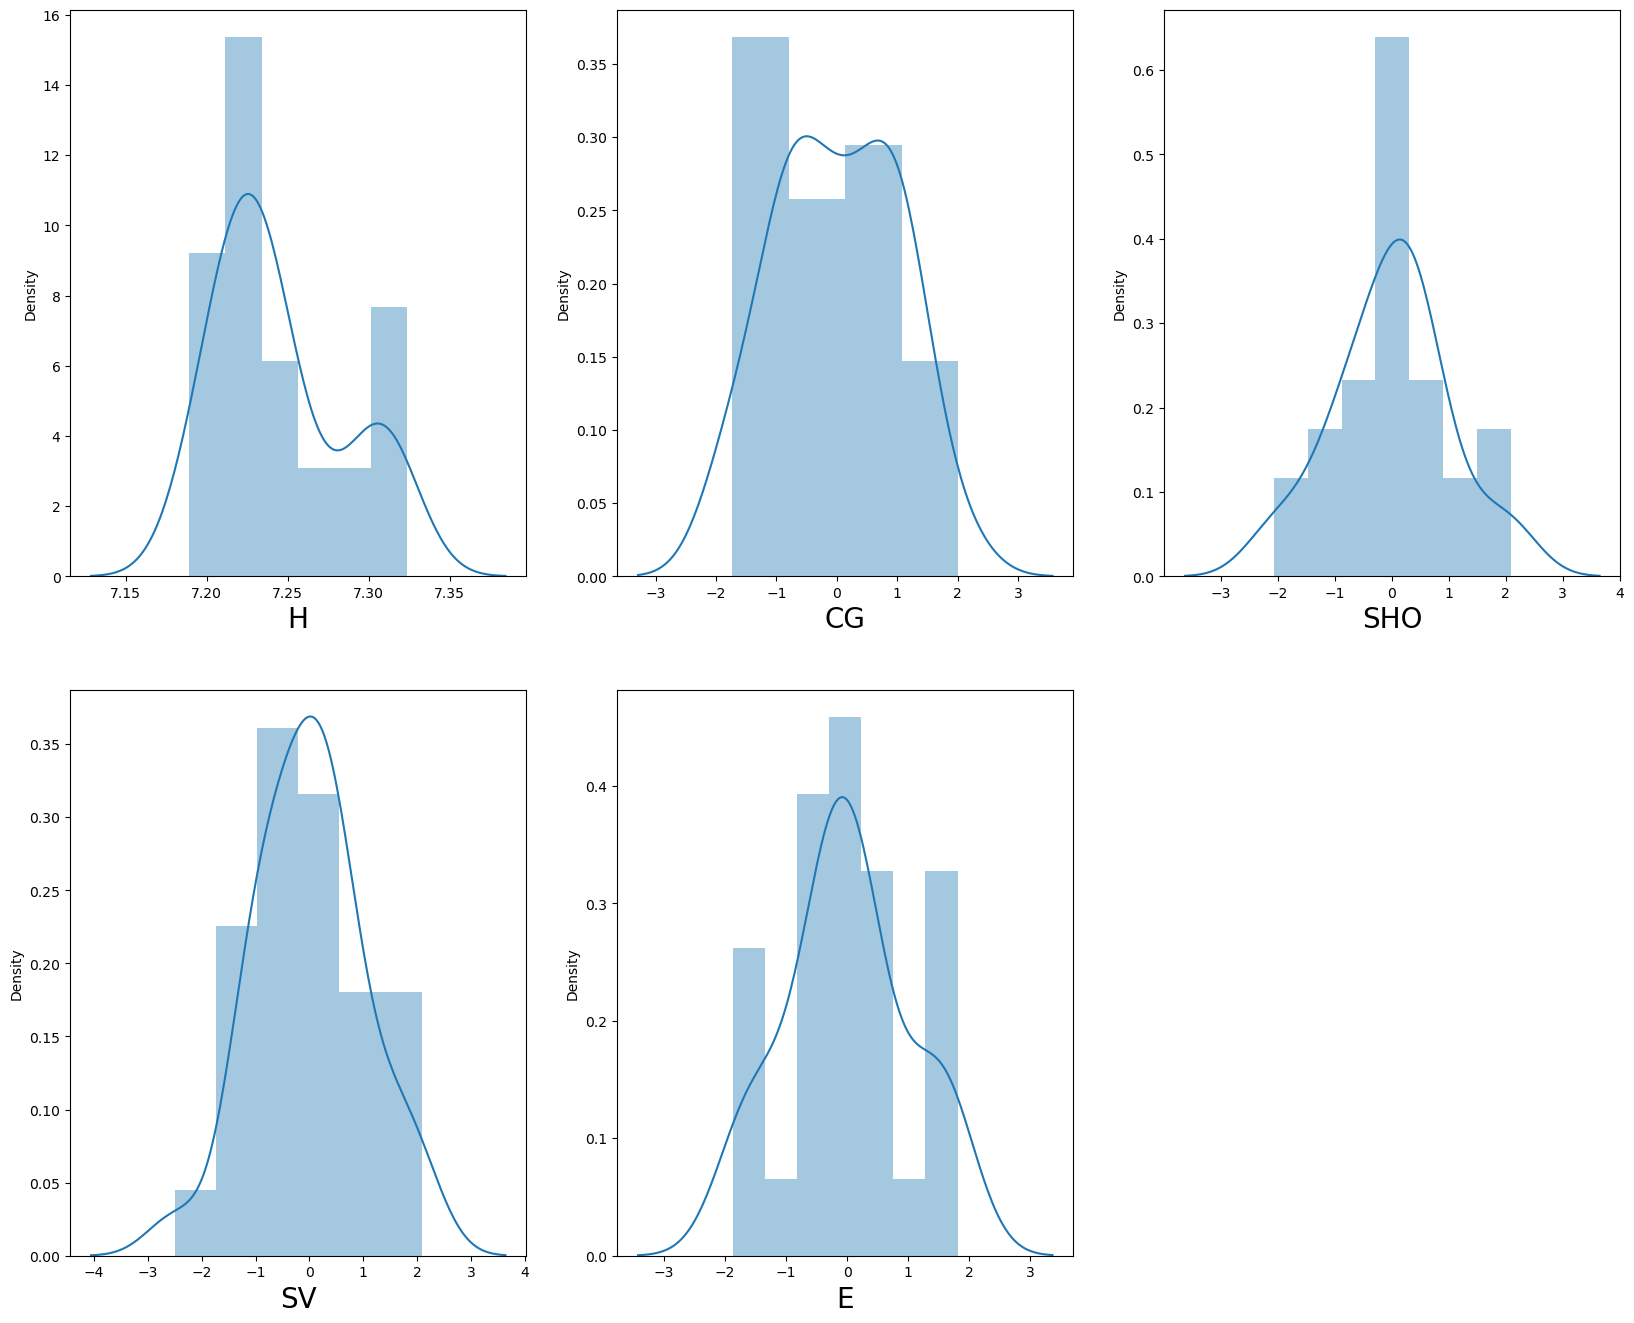

In [41]:
# After removing let's check how the data has been distributed in each column of skew_features.

plt.figure(figsize= (20,25), facecolor= 'white')
plotnumber= 1

for column in df_new[skew_features]:
    if plotnumber <=9:
        ax= plt.subplot(3,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column, fontsize= 20)
    plotnumber+=1
plt.show()

In [42]:
# Splitting the columns

x= df_new.drop("W", axis=1)
y= df_new["W"]

In [43]:
# Standard Scaler

sc= StandardScaler()
X= pd.DataFrame(sc.fit_transform(x), columns= x.columns)
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.264463,0.236737,-1.149165,-0.540820


In [44]:
# Variance Inflation Factor

vif= pd.DataFrame()
vif["vif_Features"]= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]= X.columns
vif

,vif_Features,Features
0,7.112342,R
1,20.237195,AB
2,10.114607,H
3,3.528059,2B
4,3.227808,3B
5,8.736960,HR
6,3.324550,BB
7,2.811546,SO
8,1.955254,SB
9,200.826177,RA


VIF values i can say that multicolinearity exists in RA,ER,ERA. so, let me drop RA & ER columns to avoid multicolinearity.

In [45]:
# Dropping ER
X= X.drop(["ER"], axis=1)
X.head(10)

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.496876,1.264463,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,-0.051906,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.150677,0.121871,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,-0.553131,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.194815,-1.732896,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,-0.310580,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.489319,-0.870682,0.236737,1.908137,0.237592
8,1.497899,1.752672,1.689389,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.768604,0.121871,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.349394,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.614123,0.770649,-0.513555,0.312020,1.554265


In [46]:
vif= pd.DataFrame()
vif["vif_Features"]= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]= X.columns
vif

,vif_Features,Features
0,6.069116,R
1,7.791456,AB
2,9.340727,H
3,3.227862,2B
4,3.125190,3B
5,7.474108,HR
6,3.323583,BB
7,2.786186,SO
8,1.787493,SB
9,142.535647,RA


In [47]:
# Dropping ERA

X= X.drop(["ERA"], axis=1)

In [48]:
vif= pd.DataFrame()
vif["vif_Features"]= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]= X.columns
vif

,vif_Features,Features
0,6.019438,R
1,5.210230,AB
2,7.728111,H
3,3.165732,2B
4,2.981242,3B
5,6.168639,HR
6,3.053363,BB
7,2.287734,SO
8,1.773119,SB
9,4.759240,RA


Multicolinearity issue is solved

### Splitting the data for training and testing 

In [51]:
# Let's find the best random state

lr= LinearRegression()

for i in range(0,100):
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size= 0.22, random_state= i)
    lr.fit(x_train, y_train)
    lr_predict_train= lr.predict(x_train)
    lr_predict_test= lr.predict(x_test)
    print(f'At random state{i}, The training accuracy is :-{r2_score(y_train, lr_predict_train)}')
    print(f'At random state{i}, The test accuracy is :-{r2_score(y_test, lr_predict_test)}')
    print('\n')

At random state0, The training accuracy is :-0.9768383015216393
At random state0, The test accuracy is :-0.49963681285930206


At random state1, The training accuracy is :-0.9762285427209907
At random state1, The test accuracy is :-0.1856575667552426


At random state2, The training accuracy is :-0.9638255316870876
At random state2, The test accuracy is :--0.26799016473915627


At random state3, The training accuracy is :-0.9677990948927813
At random state3, The test accuracy is :-0.677669778666316


At random state4, The training accuracy is :-0.9680569379679668
At random state4, The test accuracy is :-0.7641316816582383


At random state5, The training accuracy is :-0.9612472010423034
At random state5, The test accuracy is :-0.6051495407609998


At random state6, The training accuracy is :-0.9723763056746938
At random state6, The test accuracy is :-0.7504731543294977


At random state7, The training accuracy is :-0.9610245315460944
At random state7, The test accuracy is :-0.316695413

Random state is 99 giving highest accuracy 

In [52]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size= 0.22, random_state= 99)


In [54]:
x_train.shape

(22, 16)

In [55]:
y_train.shape

(22,)

In [56]:
x_test.shape

(7, 16)

In [57]:
y_test.shape

(7,)

In [ ]:
## Model Building
 Regression Algorithms

In [58]:
# Linear Regression
lr= LinearRegression()
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train))
lr_predict= lr.predict(x_test)

0.9633011594527366


In [59]:
print('MSE:', mean_squared_error(lr_predict, y_test))
print('MAE:', mean_absolute_error(lr_predict, y_test))
print('r2_score:', r2_score(lr_predict, y_test))

MSE: 27.07787872028507
MAE: 4.9990723975686615
r2_score: 0.8702723798743071


In [60]:
# SGD

sgd= SGDRegressor()
sgd.fit(x_train, y_train)
pred= sgd.predict(x_test)
print('R2_score:', r2_score(y_test, pred))
print('mae:', metrics.mean_squared_error(y_test, pred))
print('mae:', metrics.mean_absolute_error(y_test, pred))
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_score: -5.00578551762215e+29
mae: 6.791522881867767e+31
mae: 8213215282301155.0
rmse: 8241069640445812.0


In [61]:
# Lasso Regressor

parameters= {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10], 'random_state': list(range(0,100))}
ls= Lasso()
Z= GridSearchCV(ls, parameters)
Z.fit(x_train, y_train)
print(Z.best_params_)

{'alpha': 10, 'random_state': 0}


In [62]:
ls= Lasso(alpha=1, random_state=0)
ls.fit(x_train, y_train)
pred= ls.predict(x_test)
print('R2_score:', r2_score(y_test, pred))
print('mae:', metrics.mean_squared_error(y_test, pred))
print('mae:', metrics.mean_absolute_error(y_test, pred))
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_score: 0.8162585359689943
mae: 24.92884189547195
mae: 4.824282278813712
rmse: 4.992879118852363


In [63]:
# Ridge Regressor

parameters= {'alpha': [0.001,0.01,0.1,1,10], 'solver': ['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd= Ridge()
Z1= GridSearchCV(rd, parameters)
Z1.fit(x_train, y_train)
print(Z1.best_params_)

{'alpha': 10, 'solver': 'saga'}


In [64]:
rd= Ridge(alpha=10, solver= 'lsqr')
rd.fit(x_train, y_train)
pred= rd.predict(x_test)
print('R2_score:', r2_score(y_test, pred))
print('mae:', metrics.mean_squared_error(y_test, pred))
print('mae:', metrics.mean_absolute_error(y_test, pred))
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_score: 0.8412132657961973
mae: 21.543147122181246
mae: 4.382412931209617
rmse: 4.6414595896313955


In [66]:
# Cross Validation

np.random.seed(10)
def rmse_cv(model,x,y):
    rmse =-(cross_val_score(model,x,y, scoring= 'neg_mean_squared_error', cv=10))
    return(rmse)

models= [LinearRegression(), Ridge(), SVR(kernel= 'linear'), SVR(kernel= 'poly'), SVR(kernel= 'rbf'), RandomForestRegressor(), DecisionTreeRegressor(), GradientBoostingRegressor(),]
names= ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model, name in zip(models,names):
    score= rmse_cv(model,x,y)
    print("{}  : {:.6f}, {:4f}".format(name,score.mean(),score.mean(),score.std()))

LR  : 33.227142, 33.227142
R  : 32.549049, 32.549049
svr  : 58.165562, 58.165562
svr_p  : 111.891643, 111.891643
svr_r  : 112.275451, 112.275451
RF  : 39.864027, 39.864027
DTR  : 70.216667, 70.216667
GBR  : 47.569624, 47.569624


In [67]:
# Hyper Parameter Tuning

parameter= {'alpha':[0.01,0.1,1.0,10.26], 'selection':['cycling','random'], 'max_iter':[2,4,6,8,10], 'tol':[100,1000], 'fit_intercept':['bool']}

In [68]:
GVC= GridSearchCV(Lasso(), parameter, cv=5)

In [69]:
GVC.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.26],
                         'fit_intercept': ['bool'],
                         'max_iter': [2, 4, 6, 8, 10],
                         'selection': ['cycling', 'random'],
                         'tol': [100, 1000]})

In [70]:
GVC.best_params_

{'alpha': 1.0,
 'fit_intercept': 'bool',
 'max_iter': 4,
 'selection': 'random',
 'tol': 1000}

In [71]:
Final_mod= Lasso(alpha= 1.0, fit_intercept= "bool", max_iter=4, selection= "random", tol= 1000)
Final_mod.fit(x_train, y_train)
pred= Final_mod.predict(x_test)
print('R2_Score:', r2_score(y_test,pred)*100)
print('mean_squared_error:', metrics.mean_squared_error(y_test, pred))
print('mean_absolute_error:', metrics.mean_absolute_error(y_test, pred))
print("RMSE value:", np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 82.14634408901094
mean_squared_error: 24.22267438699087
mean_absolute_error: 3.382406451959763
RMSE value: 4.92165362322369


In [72]:
# Saving the Model
import joblib
joblib.dump(Final_mod, "BaseBallCaseStudy.pkl")

['BaseBallCaseStudy.pkl']

In [73]:
# Predictions
# Loading the saved model

model= joblib.load("BaseBallCaseStudy.pkl")

# Prediction
prediction= model.predict(x_test)
prediction

array([65.53566497, 63.37988981, 86.54148204, 75.53404691, 84.81425001,
       84.90046226, 84.00563846])

In [74]:
pd.DataFrame([model.predict(x_test)[:], y_test[:]], index= ["Predicted", "Original"])

,0,1,2,3,4,5,6
Predicted,65.535665,63.37989,86.541482,75.534047,84.81425,84.900462,84.005638
Original,67.000000,63.00000,97.000000,76.000000,83.00000,92.000000,86.000000
